# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

https://github.com/Aykan-Hub/Used-Car-Pricing
multicollinearity and VIF Variance inflation factor

Business objective 
1. what factors make a car more or less expensive
2. what consumers value in a used car

Data Task:
1. Feature or List of Features influencing the price of a car
2. Attributes that consumers prioritize when purchasing a used car

As per the problem statement, we can have to two high level objectives, First one create a model which will list attributes which contribute to the price of the car and second one which is not very clear from the data is cutomers prioritization, as the current data does not capture sale information like which cars got sold, what was bench time and what was customer ratings post purchase. We can combine both the objectives and create model assuming higher the price higher the customer priority when purchasing the used cars 

 

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from vininfo import Vin
from sklearn.preprocessing import OneHotEncoder
import re
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn import set_config


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)



In [133]:
carData = pd.read_csv("C:/HaaS/Mod11/Car/data/vehicles.csv") 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [51]:
# check the information about the data, column names, types null and count
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

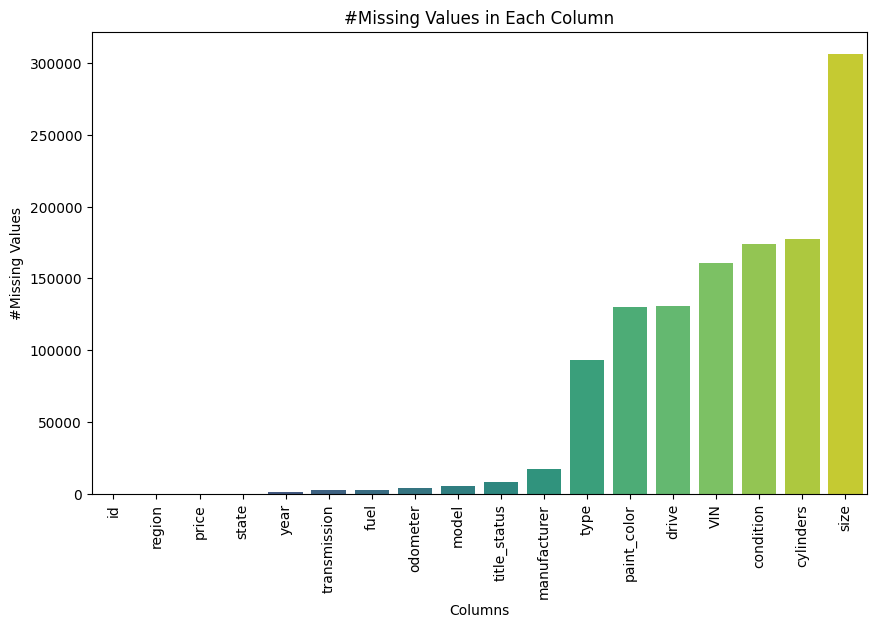

In [85]:
missing_values = carData.isnull().sum().sort_values(ascending=True)

# Draw the bar graph using seaborn to check attributes null count 
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xlabel('Columns')
plt.ylabel('#Missing Values')
plt.title('#Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()


In [86]:
for col in carData.columns:
    unique_values = carData[col].unique()
    value_counts = carData[col].value_counts()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: id
Unique values: [7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
Value counts:
id
7302181162    1
7302155994    1
7302138344    1
7302129327    1
7302123533    1
             ..
7222270760    1
7210384030    1
7222379453    1
7221952215    1
7220195662    1
Name: count, Length: 426880, dtype: int64

Column: region
Unique values: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial 

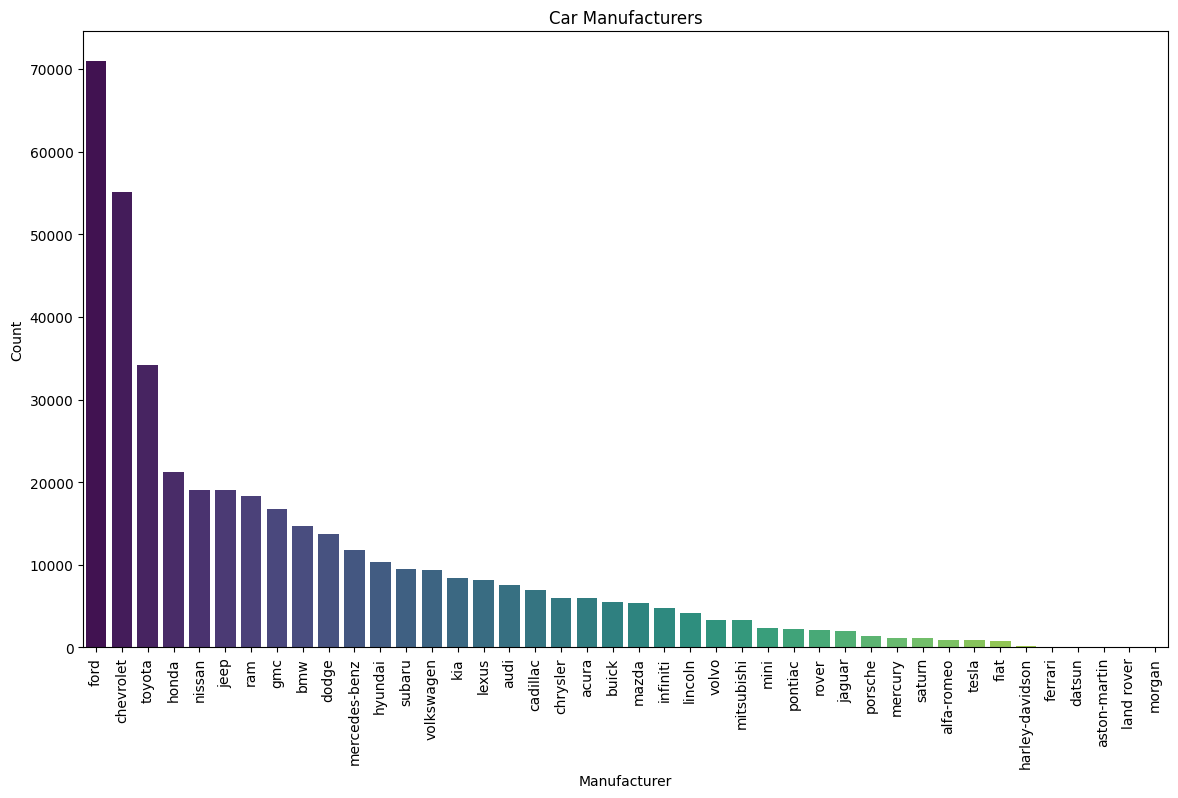

In [87]:
manufacturer_counts = carData['manufacturer'].value_counts().sort_values(ascending=False)

# check manufacturer counts to understand which manufacturer has more data 
plt.figure(figsize=(14,8))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette="viridis")
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Car Manufacturers')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate mean price per year per manufacturer
mean_price = carData.groupby(['manufacturer', 'year'])['price'].mean().reset_index()
mean_price = mean_price.sort_values(by='price', ascending=False)
# Plotting
sns.set_palette('bright')
plt.figure(figsize=(14, 8))
sns.lineplot(data=mean_price, x='manufacturer', y='price', hue='year', marker='o')
plt.title('Mean Price of Used Vehicles by Year and Manufacturer')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#See how the numeric data is distributed, mean, STD, min and max values 
carData.describe()

In [ ]:
# check how the data is distributed along year 
plt.figure(figsize=(10,6))
sns.boxplot(x=carData['year'], palette="Set3")
plt.xlabel('Year')
plt.title('Box Plot of Years')
plt.show()

In [ ]:
# visualize Price by Condition
plt.subplots(figsize=(18,10))
splot = sns.boxplot( data=carData, x='condition', y='price' )
splot.set(yscale='log')
plt.title('Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

The years are spread out from around 1960 to 2020.
There are several outliers before 1960, indicating that these years are significantly different from the rest of the data.

For car sales from 1900 t0 1960, we can do separate analysis as vintage car sales. We can get set of different attributes which may impact vintage car prices compare the regular cars

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [168]:
#drop duplicate VINS
#make sure we keep valid Vin data
vehicles = carData[carData['VIN'].apply(lambda x: len(str(x)) >= 17)]
#vehicles.drop_duplicates(subset='VIN', inplace=True)

#drop vehicles press less than 999 and gt 240000
#drop vehicles before 1960 

vehicles = vehicles[(vehicles['price'] >= 999) & (vehicles['price'] <= 240000)]
vehicles = vehicles[(vehicles['year'] > 1960)]

# If we drop the rows with empty VINS rest of the data looks good 
vehicles.info()



<class 'pandas.core.frame.DataFrame'>
Index: 231920 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   region        231920 non-null  object 
 2   price         231920 non-null  int64  
 3   year          231920 non-null  float64
 4   manufacturer  226103 non-null  object 
 5   model         230649 non-null  object 
 6   condition     141013 non-null  object 
 7   cylinders     126783 non-null  object 
 8   fuel          229700 non-null  object 
 9   odometer      230984 non-null  float64
 10  title_status  225783 non-null  object 
 11  transmission  230232 non-null  object 
 12  VIN           231920 non-null  object 
 13  drive         168069 non-null  object 
 14  size          43703 non-null   object 
 15  type          208483 non-null  object 
 16  paint_color   177441 non-null  object 
 17  state         231920 non-null  object 
dtypes: float

In [169]:
# Mapping of lowercase state abbreviations to regions
state_to_region = {
    'ct': 'Northeast', 'me': 'Northeast', 'ma': 'Northeast', 'nh': 'Northeast', 'ri': 'Northeast', 'vt': 'Northeast',
    'nj': 'Northeast', 'ny': 'Northeast', 'pa': 'Northeast',
    'il': 'Midwest', 'in': 'Midwest', 'mi': 'Midwest', 'oh': 'Midwest', 'wi': 'Midwest',
    'ia': 'Midwest', 'ks': 'Midwest', 'mn': 'Midwest', 'mo': 'Midwest', 'ne': 'Midwest', 'nd': 'Midwest', 'sd': 'Midwest',
    'de': 'South', 'fl': 'South', 'ga': 'South', 'md': 'South', 'nc': 'South', 'sc': 'South', 'va': 'South', 'wv': 'South', 'dc': 'South',
    'al': 'South', 'ky': 'South', 'ms': 'South', 'tn': 'South',
    'ar': 'South', 'la': 'South', 'ok': 'South', 'tx': 'South',
    'az': 'West', 'co': 'West', 'id': 'West', 'mt': 'West', 'nv': 'West', 'nm': 'West', 'ut': 'West', 'wy': 'West',
    'ak': 'West', 'ca': 'West', 'hi': 'West', 'or': 'West', 'wa': 'West'
}


# Map the states to regions
vehicles['region_map'] = vehicles['state'].map(state_to_region)

# Get the value counts for each region
region_counts = vehicles['region_map'].value_counts()
print(region_counts)





region_map
West         74817
South        69835
Midwest      50146
Northeast    37122
Name: count, dtype: int64


In [170]:
vehicles.drop(columns=['region','state'], inplace=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231920 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   price         231920 non-null  int64  
 2   year          231920 non-null  float64
 3   manufacturer  226103 non-null  object 
 4   model         230649 non-null  object 
 5   condition     141013 non-null  object 
 6   cylinders     126783 non-null  object 
 7   fuel          229700 non-null  object 
 8   odometer      230984 non-null  float64
 9   title_status  225783 non-null  object 
 10  transmission  230232 non-null  object 
 11  VIN           231920 non-null  object 
 12  drive         168069 non-null  object 
 13  size          43703 non-null   object 
 14  type          208483 non-null  object 
 15  paint_color   177441 non-null  object 
 16  region_map    231920 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 31

In [137]:
def fill_missing_values(df, columns):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        for column_name in columns:
            # Check if the value in the specified column is null
            if pd.isnull(row[column_name]):
                # Find similar records where VIN, make, model, and year match and the column is not null
                similar_records = df[(df['VIN'] == row['VIN']) & 
                                     (df['manufacturer'] == row['manufacturer']) & 
                                     (df['model'] == row['model']) & 
                                     (df['year'] == row['year'])]
                
                # If similar records are found, fill the missing value with the first similar record's value
                if not similar_records.empty:
                    df.at[index, column_name] = similar_records.iloc[0][column_name]
    
    return df

In [100]:
check_columns = ['type','paint_color','drive','condition','cylinders','size']
vehicles = fill_missing_values(vehicles,check_columns) 

In [145]:
#above step is taking long time, save a copy of data to reduce the time 
missing_filled_Data = vehicles 

In [102]:
vehicles =missing_filled_Data

In [171]:
def fill_with_src_if_null(df, src, dest):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check if the value in the destination column is null
        if pd.isnull(row[dest]):
            # Fill the destination column with the source column value if it's not empty
            if pd.notnull(row[src]):
                df.at[index, dest] = row[src]
    
    return df

vehicles = fill_with_src_if_null(vehicles, 'title_status', 'condition')

# set vehicle condition properly for copied values from title status
vehicles.loc[vehicles['condition'].isin(['rebuilt', 'parts only']), 'condition'] = 'salvage'
vehicles.loc[vehicles['condition'].isin(['lien', 'missing']), 'condition'] = np.nan
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231920 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   price         231920 non-null  int64  
 2   year          231920 non-null  float64
 3   manufacturer  226103 non-null  object 
 4   model         230649 non-null  object 
 5   condition     230093 non-null  object 
 6   cylinders     126783 non-null  object 
 7   fuel          229700 non-null  object 
 8   odometer      230984 non-null  float64
 9   title_status  225783 non-null  object 
 10  transmission  230232 non-null  object 
 11  VIN           231920 non-null  object 
 12  drive         168069 non-null  object 
 13  size          43703 non-null   object 
 14  type          208483 non-null  object 
 15  paint_color   177441 non-null  object 
 16  region_map    231920 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 39

In [172]:
# fill 'manufacturer' from known VIN matches, build a lookup table for first 3 characters of VIN
vehicles['make'] = vehicles['VIN'].str[0:3]

# drop NaN columns in feature and VIN
# sort it by the most common values per manufacturer first
make = vehicles.dropna(subset=['make', 'manufacturer']).groupby(['make', 'manufacturer']).count().sort_values(
    by='id', ascending=False).reset_index()[['make', 'manufacturer']]

# keep only the first value of manufacturer per 'make' which is actually 'manufacturer' in VIN 
make = make.groupby(['make']).first().reset_index()

# merge data with the lookup dataframe for 'manufacturer'
vehicles = vehicles.merge(make, how='left', on=['make'], suffixes=('', '_right'))

# fill in 'manufacturer' with manufacturer_right
vehicles['manufacturer'].fillna(vehicles['manufacturer_right'], inplace=True)

# drop intermediate columns
vehicles.drop(['manufacturer_right', 'make'], axis=1, inplace=True)


In [173]:
# fill 'size'
vehicles.loc[~vehicles['model'].isnull() & vehicles['size'].isnull(), 'size'] = \
    vehicles[~vehicles['model'].isnull() & vehicles['size'].isnull()]['model'].str.extract(r'[\w]*(4d|2d)[\w]*', flags=re.IGNORECASE)

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231920 entries, 0 to 231919
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   price         231920 non-null  int64  
 2   year          231920 non-null  float64
 3   manufacturer  229415 non-null  object 
 4   model         230649 non-null  object 
 5   condition     230093 non-null  object 
 6   cylinders     126783 non-null  object 
 7   fuel          229700 non-null  object 
 8   odometer      230984 non-null  float64
 9   title_status  225783 non-null  object 
 10  transmission  230232 non-null  object 
 11  VIN           231920 non-null  object 
 12  drive         168069 non-null  object 
 13  size          43703 non-null   object 
 14  type          208483 non-null  object 
 15  paint_color   177441 non-null  object 
 16  region_map    231920 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

In [174]:
# fill 'drive'
vehicles.loc[~vehicles['model'].isnull() & vehicles['drive'].isnull(), 'drive'] = \
    vehicles[~vehicles['model'].isnull() & vehicles['drive'].isnull()]['model'].str.extract(r'[\w]*(awd|4wd|2wd|fwd|rwd)[\w]*', flags=re.IGNORECASE)

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231920 entries, 0 to 231919
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   price         231920 non-null  int64  
 2   year          231920 non-null  float64
 3   manufacturer  229415 non-null  object 
 4   model         230649 non-null  object 
 5   condition     230093 non-null  object 
 6   cylinders     126783 non-null  object 
 7   fuel          229700 non-null  object 
 8   odometer      230984 non-null  float64
 9   title_status  225783 non-null  object 
 10  transmission  230232 non-null  object 
 11  VIN           231920 non-null  object 
 12  drive         168069 non-null  object 
 13  size          43703 non-null   object 
 14  type          208483 non-null  object 
 15  paint_color   177441 non-null  object 
 16  region_map    231920 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

In [175]:
# replace scion with toyota, ram with dodge
vehicles['manufacturer'].replace({'scion':'toyota', 'ram':'dodge'}, inplace=True)

In [176]:
# fill 'transmission'
vehicles.loc[~vehicles['model'].isnull() & vehicles['transmission'].isnull(), 'transmission'] = \
    vehicles[~vehicles['model'].isnull() & vehicles['transmission'].isnull()
            ]['model'].str.extract(r'[\w]*(automatic|manual)[\w]*', flags=re.IGNORECASE)

In [177]:
# a function to fill missing features by VIN make, model, year
def fill_feature_by_vin(data, feature):
    # build a lookup dataframe with columns just [vehicles['VIN'].str[0:8]+vehicles['VIN'].str[9], feature]
    # make a key from VIN per make, brand, year
    data['key1'] = data['VIN'].str[0:8]+data['VIN'].str[9]
    # drop NaN columns in feature and VIN
    # sort it by the most common values per feature first
    dff1 = data.dropna(subset=['key1', feature]).groupby(['key1', feature]).count().sort_values(
        by='id', ascending=False).reset_index()[['key1', feature]]

    # keep only the first value of feature per 'key1' which is year', 'manufacturer', 'model' 
    dff1 = dff1.groupby(['key1']).first().reset_index()

    # generalize by removing 'year' for second attempt!
    dff2 = dff1
    # make a key from VIN per make, brand without year
    dff2['key2'] = dff2['key1'].str[0:8]
    dff2 = dff2[['key2', feature]].groupby(['key2']).first().reset_index()

    # merge data with the lookup dataframe for features for 1st attempt
    data = data.merge(dff1, how='left', on=['key1'], suffixes=('', '_right1'))

    # merge data with the lookup dataframe for features for 2nd attempt
    data = data.merge(dff2, how='left', on=['key2'], suffixes=('', '_right2'))

    # if 'other' reset value in feature and fill from model mappings
    data.loc[data[feature] == 'other', feature] = np.nan
    
    # fill in feature with feature_right1 - 1st attempt
    data[feature].fillna(data[feature+'_right1'], inplace=True)

    # fill in feature with feature_right2 - 2nd attempt if feature not year
    if feature != 'year':
        data[feature].fillna(data[feature+'_right2'], inplace=True)

    # drop feature_right1 and 2
    data.drop([feature+'_right1', feature+'_right2', 'key1', 'key2'], axis=1, inplace=True)
    return data

In [178]:
vehicles = fill_feature_by_vin(vehicles, 'fuel')
vehicles = fill_feature_by_vin(vehicles, 'transmission')
vehicles = fill_feature_by_vin(vehicles, 'drive')
vehicles = fill_feature_by_vin(vehicles, 'size')
vehicles = fill_feature_by_vin(vehicles, 'type')
vehicles = fill_feature_by_vin(vehicles, 'manufacturer')
vehicles = fill_feature_by_vin(vehicles, 'model')
vehicles = fill_feature_by_vin(vehicles, 'year')
vehicles = fill_feature_by_vin(vehicles, 'cylinders')

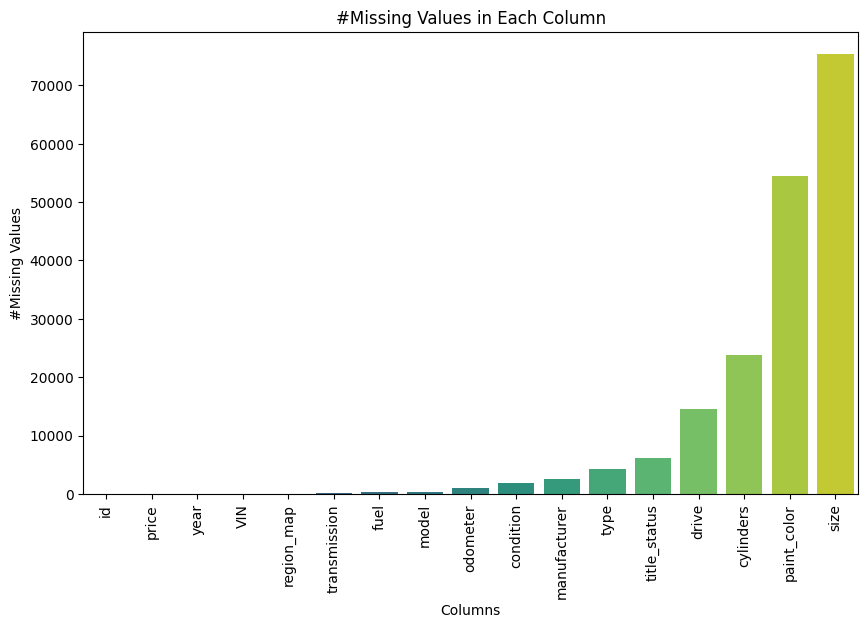

In [64]:
missing_values = vehicles.isnull().sum().sort_values(ascending=True)

# Draw the bar graph using seaborn to check attributes null count 
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xlabel('Columns')
plt.ylabel('#Missing Values')
plt.title('#Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [179]:
vehicles.loc[pd.notna(vehicles['VIN']) & (vehicles['VIN'] != ''), 'VIN'] = 1
vehicles.loc[pd.isna(vehicles['VIN']) | (vehicles['VIN'] == ''), 'VIN'] = 0

In [180]:
#set vehicle condition properly for copied values from title status
vehicles.loc[vehicles['condition'].isin(['rebuilt', 'parts only']), 'condition'] = 'salvage'
vehicles.loc[vehicles['condition'].isin(['lien', 'missing']), 'condition'] = np.nan

In [181]:
# Mapping dictionary
transmission_mapping = {'manual': 0, 'automatic': 1, 'other': 2}

# Replace transmission values based on the mapping
vehicles.loc[:, 'transmission'] = vehicles['transmission'].map(transmission_mapping)

# Fill NaN values with 2
vehicles.loc[vehicles['transmission'].isna(), 'transmission'] = 2

In [182]:
# Count null values in 'cylinder' column
vehicles['cylinders'].replace('other', pd.NA, inplace=True)
cylinder_mapping = {'3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8,'10 cylinders': 10, '12 cylinders': 12}
vehicles['cylinders'] = vehicles['cylinders'].map(cylinder_mapping)

# Convert all values to numeric, coercing errors to NaN
vehicles['cylinders'] = pd.to_numeric(vehicles['cylinders'], errors='coerce')

condition_mapping = {
    
    'new': 1,
    'like new': 2,
    'excellent': 3,
    'good': 4,
    'clean': 5,
    'fair': 6,
    'salvage': 7
}
# Replace condition values based on the mapping
vehicles['condition'] = vehicles['condition'].map(condition_mapping)

fuel_mapping = {
    'gas': 1,
    'diesel': 2,
    'hybrid': 3,
    'electric': 4,
    'other': 5
    }

# Replace fuel values based on the mapping
vehicles['fuel'] = vehicles['fuel'].map(fuel_mapping)

# Mapping dictionary for label encoding
region_map_mapping = {
    'West': 1,
    'South': 2,
    'Northeast': 3,
    'Midwest': 4
}

# Replace region_map values based on the mapping
vehicles['region_map'] = vehicles['region_map'].map(region_map_mapping)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231920 entries, 0 to 231919
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   price         231920 non-null  int64  
 2   year          231920 non-null  float64
 3   manufacturer  229415 non-null  object 
 4   model         231577 non-null  object 
 5   condition     230093 non-null  float64
 6   cylinders     206846 non-null  float64
 7   fuel          231606 non-null  float64
 8   odometer      230984 non-null  float64
 9   title_status  225783 non-null  object 
 10  transmission  231920 non-null  object 
 11  VIN           231920 non-null  object 
 12  drive         217304 non-null  object 
 13  size          156502 non-null  object 
 14  type          227688 non-null  object 
 15  paint_color   177441 non-null  object 
 16  region_map    231920 non-null  int64  
dtypes: float64(5), int64(3), object(9)
memory usage:

In [183]:
vehicles['paint_color'].fillna('unknown', inplace=True)
print(vehicles.info())
check_Df = vehicles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231920 entries, 0 to 231919
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            231920 non-null  int64  
 1   price         231920 non-null  int64  
 2   year          231920 non-null  float64
 3   manufacturer  229415 non-null  object 
 4   model         231577 non-null  object 
 5   condition     230093 non-null  float64
 6   cylinders     206846 non-null  float64
 7   fuel          231606 non-null  float64
 8   odometer      230984 non-null  float64
 9   title_status  225783 non-null  object 
 10  transmission  231920 non-null  object 
 11  VIN           231920 non-null  object 
 12  drive         217304 non-null  object 
 13  size          156502 non-null  object 
 14  type          227688 non-null  object 
 15  paint_color   231920 non-null  object 
 16  region_map    231920 non-null  int64  
dtypes: float64(5), int64(3), object(9)
memory usage:

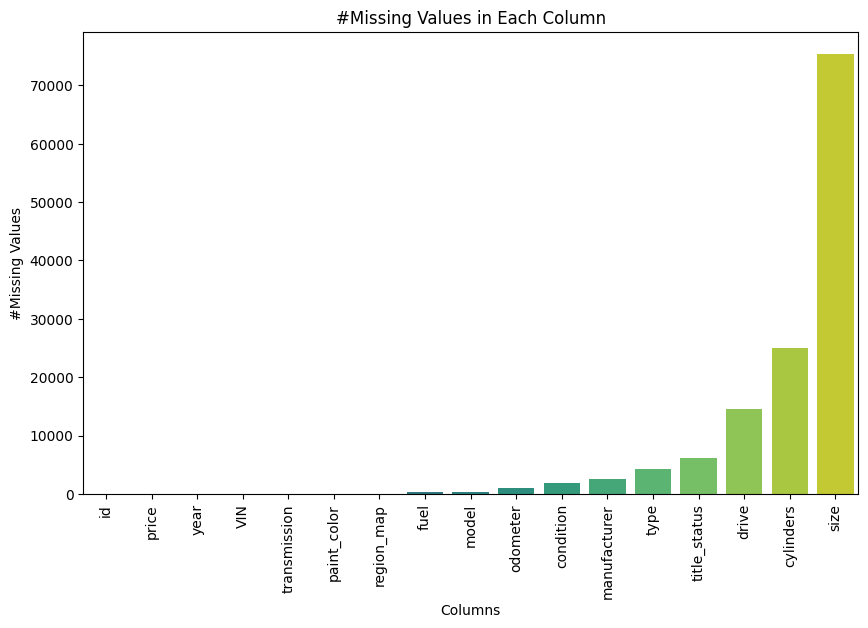

In [115]:
missing_values = vehicles.isnull().sum().sort_values(ascending=True)

# Draw the bar graph using seaborn to check attributes null count 
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xlabel('Columns')
plt.ylabel('#Missing Values')
plt.title('#Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [186]:
vehicles.drop(columns=['id','VIN','size','model','title_status'], axis=1, inplace=True)
print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231920 entries, 0 to 231919
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         231920 non-null  int64  
 1   year          231920 non-null  float64
 2   manufacturer  229415 non-null  object 
 3   condition     230093 non-null  float64
 4   cylinders     206846 non-null  float64
 5   fuel          231606 non-null  float64
 6   odometer      230984 non-null  float64
 7   transmission  231920 non-null  object 
 8   drive         217304 non-null  object 
 9   type          227688 non-null  object 
 10  paint_color   231920 non-null  object 
 11  region_map    231920 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 21.2+ MB
None


In [187]:
# remove null entries from the dataset

vehicles.dropna(inplace=True)
print(vehicles.info())
temp = vehicles

<class 'pandas.core.frame.DataFrame'>
Index: 194991 entries, 0 to 231919
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         194991 non-null  int64  
 1   year          194991 non-null  float64
 2   manufacturer  194991 non-null  object 
 3   condition     194991 non-null  float64
 4   cylinders     194991 non-null  float64
 5   fuel          194991 non-null  float64
 6   odometer      194991 non-null  float64
 7   transmission  194991 non-null  object 
 8   drive         194991 non-null  object 
 9   type          194991 non-null  object 
 10  paint_color   194991 non-null  object 
 11  region_map    194991 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 19.3+ MB
None


In [188]:
# replace awd/rwd/fwd with 1 and 0 for 4wd/2wd in drive to make it binary
vehicles['drive'].replace({'awd':1,'rwd':0,'fwd':0,'4wd':1,'2wd':0}, inplace=True)
# fill remaining missing drive values as 2wd
vehicles['drive'].fillna(0, inplace=True)

In [167]:
for col in temp.columns:
    unique_values = temp[col].unique()
    value_counts = temp[col].value_counts()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: price
Unique values: [33590 22590 39590 ...  4760  6328 19853]
Value counts:
price
29990    2112
7995     1806
9995     1793
6995     1760
8995     1729
         ... 
15631       1
11957       1
12586       1
62521       1
9808        1
Name: count, Length: 10637, dtype: int64

Column: year
Unique values: [2014. 2010. 2020. 2017. 2012. 2016. 2011. 2019. 2018. 2015. 2013. 2008.
 2007. 2006. 2002. 2009. 1995. 1999. 2003. 2004. 1996. 2000. 1991. 2005.
 1997. 2001. 2021. 1998. 1994. 1985. 1989. 1987. 1990. 1992. 1984. 1981.
 1982. 1986. 1993. 1988. 2022. 1980. 1983. 1975. 1978. 1962. 1969. 1968.
 1965.]
Value counts:
year
2018.0    21527
2017.0    20903
2016.0    16992
2015.0    16182
2013.0    16082
2014.0    15622
2019.0    13825
2012.0    12267
2011.0     9660
2020.0     9190
2010.0     7112
2008.0     6713
2007.0     5409
2009.0     4891
2006.0     4322
2005.0     3388
2004.0     2715
2003.0     1912
2002.0     1406
2001.0     1032
2000.0      756
1999.0      683
2021.0      56

In [189]:
# Frequency encoding for 'manufacturer' column
manufacturer_freqs = vehicles['manufacturer'].value_counts() / len(vehicles)
vehicles['manufacturer_freqs'] = vehicles['manufacturer'].map(manufacturer_freqs)

 
#drop model and multiply paint with 100
#hot encoding for type
# Frequency encoding for 'model' column
paint_freqs = vehicles['paint_color'].value_counts() / len(vehicles)*100
vehicles['paint_freqs'] = vehicles['paint_color'].map(paint_freqs)


print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
Index: 194991 entries, 0 to 231919
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               194991 non-null  int64  
 1   year                194991 non-null  float64
 2   manufacturer        194991 non-null  object 
 3   condition           194991 non-null  float64
 4   cylinders           194991 non-null  float64
 5   fuel                194991 non-null  float64
 6   odometer            194991 non-null  float64
 7   transmission        194991 non-null  object 
 8   drive               194991 non-null  int64  
 9   type                194991 non-null  object 
 10  paint_color         194991 non-null  object 
 11  region_map          194991 non-null  int64  
 12  manufacturer_freqs  194991 non-null  float64
 13  paint_freqs         194991 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 22.3+ MB
None


In [196]:
vehicles.drop(columns=['manufacturer','paint_color'], axis=1, inplace=True)

In [191]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194991 entries, 0 to 231919
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               194991 non-null  int64  
 1   year                194991 non-null  float64
 2   condition           194991 non-null  float64
 3   cylinders           194991 non-null  float64
 4   fuel                194991 non-null  float64
 5   odometer            194991 non-null  float64
 6   transmission        194991 non-null  object 
 7   drive               194991 non-null  int64  
 8   type                194991 non-null  object 
 9   paint_color         194991 non-null  object 
 10  region_map          194991 non-null  int64  
 11  manufacturer_freqs  194991 non-null  float64
 12  paint_freqs         194991 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 20.8+ MB


In [197]:
# Assuming 'vehicles' is your DataFrame
vehicles_num = pd.get_dummies(vehicles, columns=['type'])

print(vehicles_num.head())


   price    year  condition  cylinders  fuel  odometer transmission  drive  \
0  33590  2014.0        4.0        8.0   1.0   57923.0          2.0      0   
1  22590  2010.0        4.0        8.0   1.0   71229.0          2.0      0   
2  39590  2020.0        4.0        8.0   1.0   19160.0          2.0      0   
3  30990  2017.0        4.0        8.0   1.0   41124.0          2.0      0   
4  27990  2012.0        4.0        8.0   1.0   68696.0          2.0      1   

   region_map  manufacturer_freqs  ...  type_coupe  type_hatchback  \
0           2            0.041499  ...       False           False   
1           2            0.125021  ...       False           False   
2           2            0.125021  ...       False           False   
3           2            0.093640  ...       False           False   
4           2            0.041499  ...       False           False   

   type_mini-van  type_offroad  type_other  type_pickup  type_sedan  \
0          False         False       Fa

In [201]:
numeric_df = vehicles.select_dtypes(include=['number'])

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'fuel'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'drive'}>,
        <Axes: title={'center': 'region_map'}>,
        <Axes: title={'center': 'manufacturer_freqs'}>],
       [<Axes: title={'center': 'paint_freqs'}>, <Axes: >, <Axes: >]],
      dtype=object)

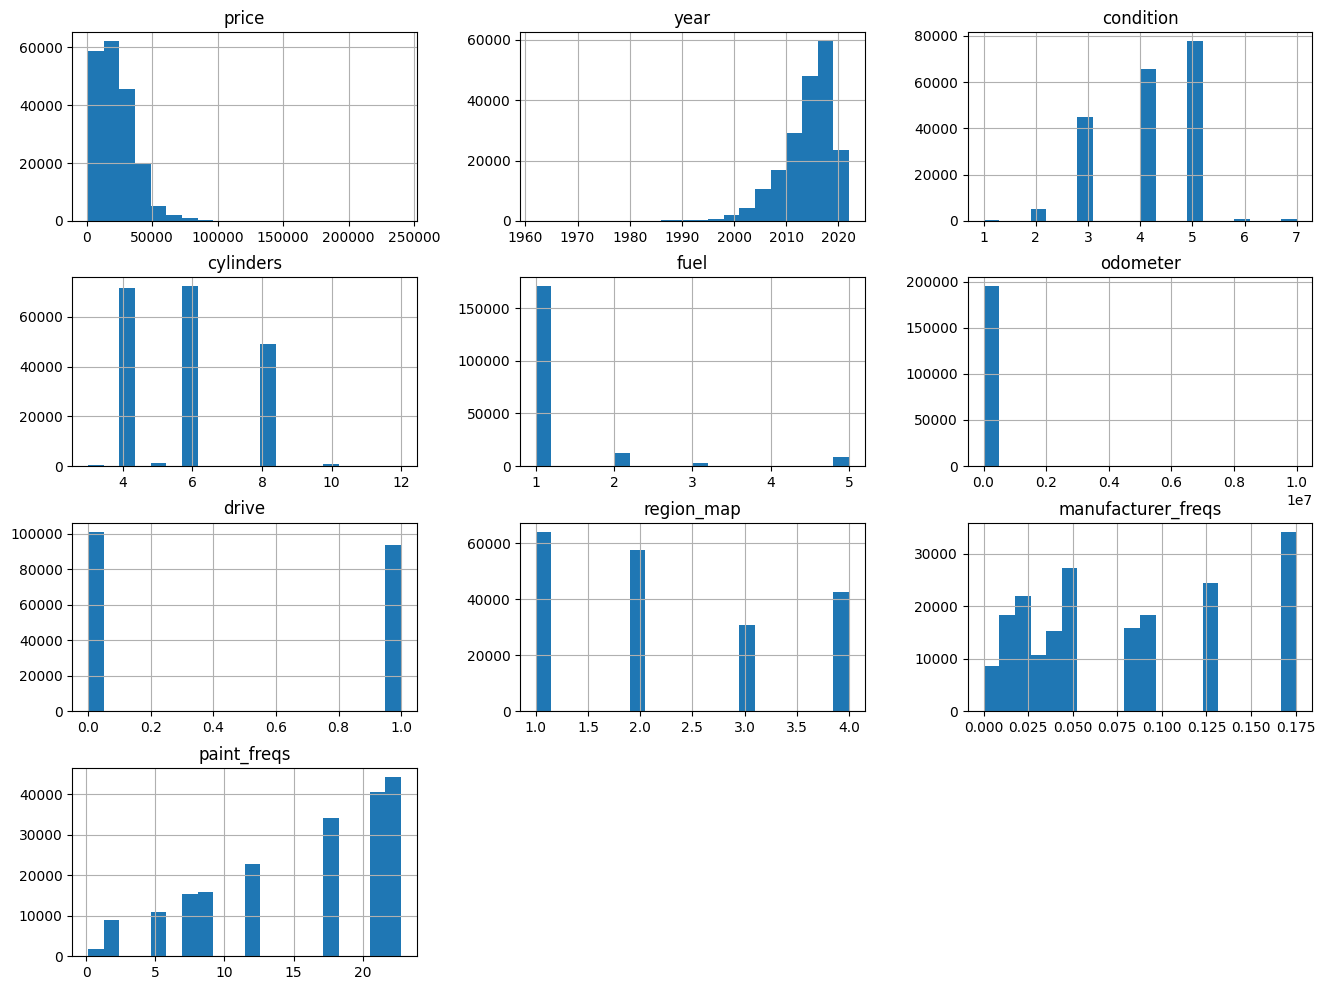

In [193]:
vehicles.hist(bins=20, figsize = (16, 12))

<Axes: >

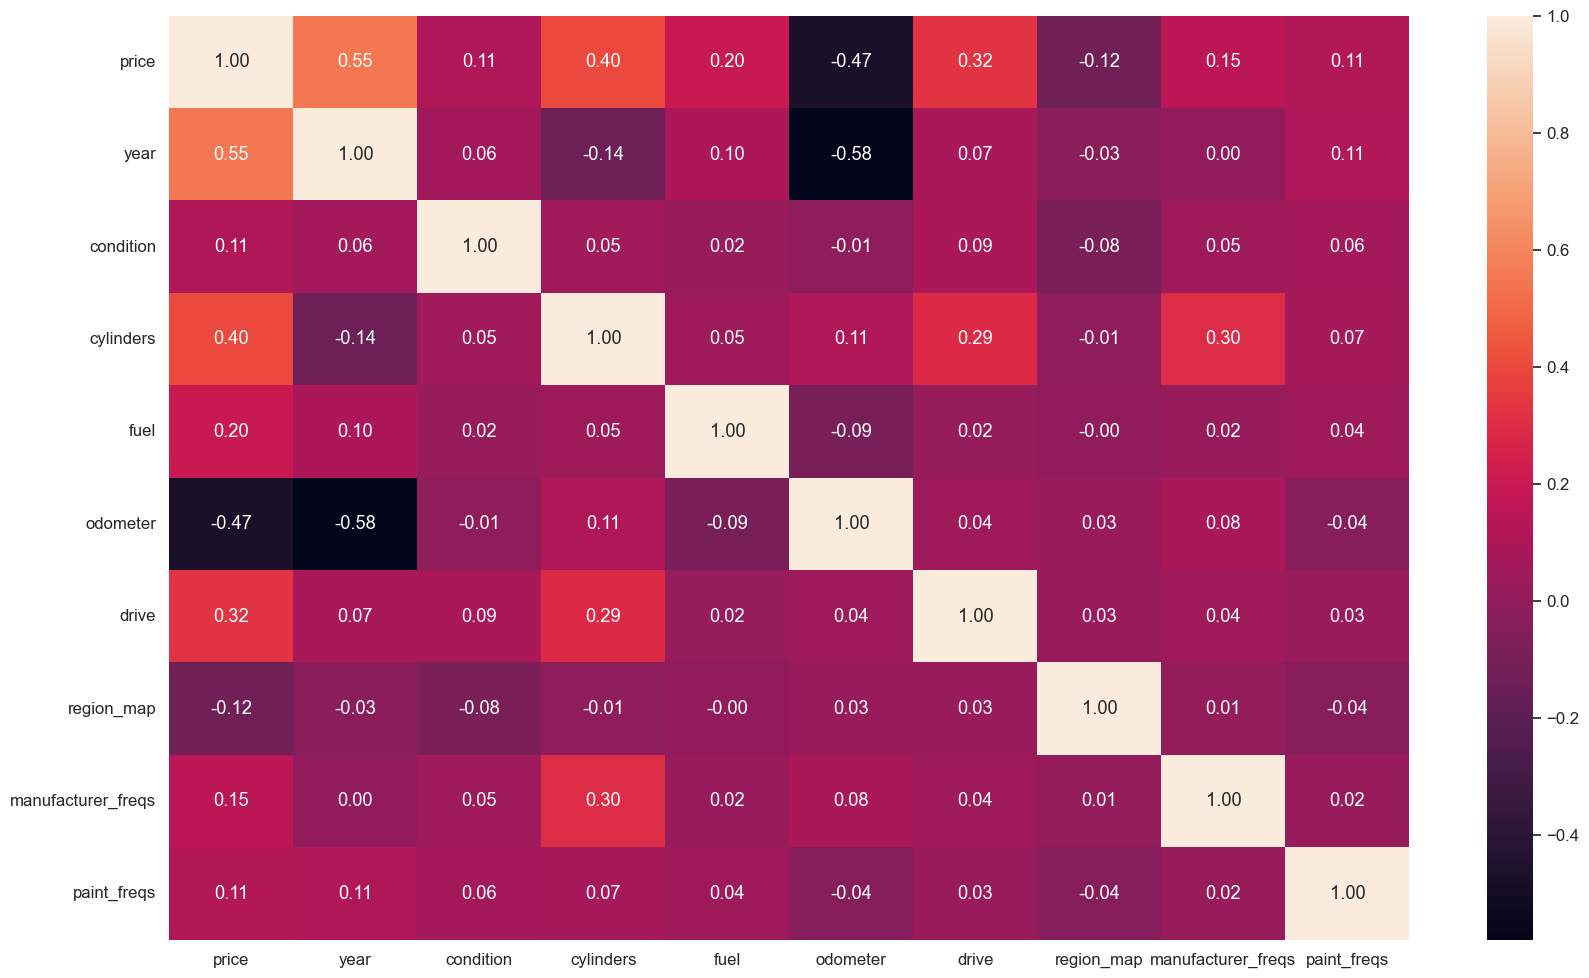

In [202]:
#heatmap
plt.subplots(figsize=(20,12))
sns.set(font_scale=1.1)
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')

In [ ]:
for column in vehicles.columns:
    sns.histplot(vehicles[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

ValueError: Could not interpret value `region` for `hue`. An entry with this name does not appear in `data`.

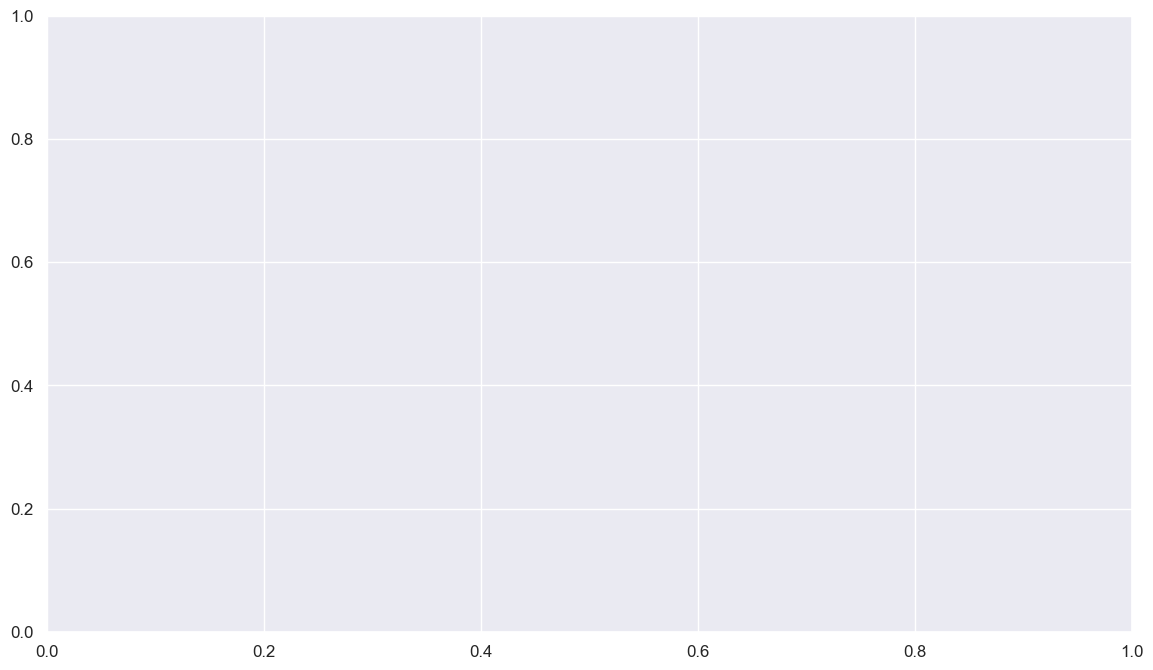

In [206]:
# Add a constant column for intercept
vehicles_with_const = add_constant(numeric_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = vehicles_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(vehicles_with_const.values, i) for i in range(vehicles_with_const.shape[1])]

print(vif_data)

               Feature            VIF
0                const  355621.500311
1                price       2.707943
2                 year       2.093902
3            condition       1.024619
4            cylinders       1.726817
5                 fuel       1.050995
6             odometer       1.733471
7                drive       1.211653
8           region_map       1.036340
9   manufacturer_freqs       1.119396
10         paint_freqs       1.024502


In [208]:
def calculate_permutation_importance(model, X, y, n_repeats=30, random_state=42):
    """
    Calculate permutation importance for a given model and dataset.

    Parameters:
    - model: Trained model
    - X: Feature matrix
    - y: Target vector
    - n_repeats: Number of times to permute a feature
    - random_state: Random seed for reproducibility

    Returns:
    - importance_df: DataFrame with feature names and their importance scores
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Calculate permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=n_repeats, random_state=random_state)
    
    # Create a DataFrame to hold the results
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean,
        'Std': result.importances_std
    })
    
    return importance_df

# split data
X, y = vehicles_num.drop(columns='price'), vehicles_num['price']
##X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 43, test_size = 0.2)


model = RandomForestRegressor()

importance_df = calculate_permutation_importance(model, X, y)
print(importance_df)

               Feature    Importance       Std
0                 year  5.704414e-01  0.007451
1            condition  3.732737e-02  0.001553
2            cylinders  5.825114e-01  0.010618
3                 fuel  1.352689e-01  0.001810
4             odometer  3.386810e-01  0.004625
5         transmission  5.181389e-02  0.001639
6                drive  8.630172e-02  0.001422
7           region_map  1.961239e-02  0.000436
8   manufacturer_freqs  2.155724e-01  0.005771
9          paint_freqs  1.698742e-02  0.000409
10            type_SUV  1.338146e-02  0.000487
11            type_bus  8.317115e-07  0.000006
12    type_convertible  2.504342e-03  0.000208
13          type_coupe  5.512410e-03  0.000342
14      type_hatchback  1.615429e-03  0.000073
15       type_mini-van  3.010848e-04  0.000022
16        type_offroad  3.639348e-05  0.000002
17          type_other  2.464693e-03  0.000149
18         type_pickup  1.926813e-02  0.000444
19          type_sedan  1.429356e-02  0.000504
20          t

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [211]:
# split data
X, y = vehicles.drop(columns='price'), vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, test_size = 0.3)

In [212]:
# permutation importance for hyperparameters
#function to execute permutation importance!
def column_importance(X, y):
    features = [c for c in X.select_dtypes(exclude=np.number).columns if c in X.columns]
    ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough")

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, train_size=0.7, test_size=0.3)
    # fit model with training set
    # set alpha to 10 for analyzing importance
    pipe = Pipeline([('transformer', ohe_step),
                     ('scaler', StandardScaler(with_mean=False)),
                     ('ridge', Ridge(alpha = 10)) ])
    model = pipe.fit(X_train, y_train)
    # score with test set
    print('model r^2 :', model.score(X_test, y_test))
    # permutation importance
    r = permutation_importance(model, X_test, y_test, n_repeats = 50, random_state = 93)
    print('importance:', r.importances_mean)
    return model, X_test, y_test, pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(
        by = "Importance", ascending = False)

In [213]:
model, Xp_test, yp_test, ranking = column_importance(X, y)
ranking

model r^2 : 0.6809525295766541
importance: [4.10622322e-01 1.50339304e-03 2.09373986e-01 2.11703723e-02
 1.04026344e-01 4.64285267e-03 4.82383670e-02 1.07961625e-01
 1.59273906e-02 9.12051444e-04 1.67938666e-04]


Column  Importance
0                 year    0.410622
2            cylinders    0.209374
7                 type    0.107962
4             odometer    0.104026
6                drive    0.048238
3                 fuel    0.021170
8           region_map    0.015927
5         transmission    0.004643
1            condition    0.001503
9   manufacturer_freqs    0.000912
10         paint_freqs    0.000168

In [214]:
complexity = 4
train_mses = []
test_mses = []
features = X_train.select_dtypes(exclude=np.number).columns
for d in range(1, complexity):
    #create pipeline with PolynomialFeatures degree d 
    ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features) )
    
    pipe = Pipeline([('transformer', ohe_step),
                     ('polyfeatures', PolynomialFeatures(degree = d, include_bias = False)),
                     ('scaler', StandardScaler(with_mean=False)),
                     ('linreg', LinearRegression())])
    #fit on train
    pipe.fit(X_train, y_train)
    #compute mean squared errors
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, pipe.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, pipe.predict(X_test)))
# Answer check
print(pipe.named_steps)
print(train_mses)
print(test_mses)
print(pipe.score(X_test, y_test))
pipe

{'transformer': ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 Index(['transmission', 'type'], dtype='object'))]), 'polyfeatures': PolynomialFeatures(degree=3, include_bias=False), 'scaler': StandardScaler(with_mean=False), 'linreg': LinearRegression()}
[np.float64(152215053.83492693), np.float64(148109176.7911823), np.float64(148109176.79150492)]
[np.float64(146160812.16658613), np.float64(142225538.74091226), np.float64(142225545.40333292)]
0.2951916664124765


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['transmission', 'type'], dtype='object'))])),
                ('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('linreg', LinearRegression())])

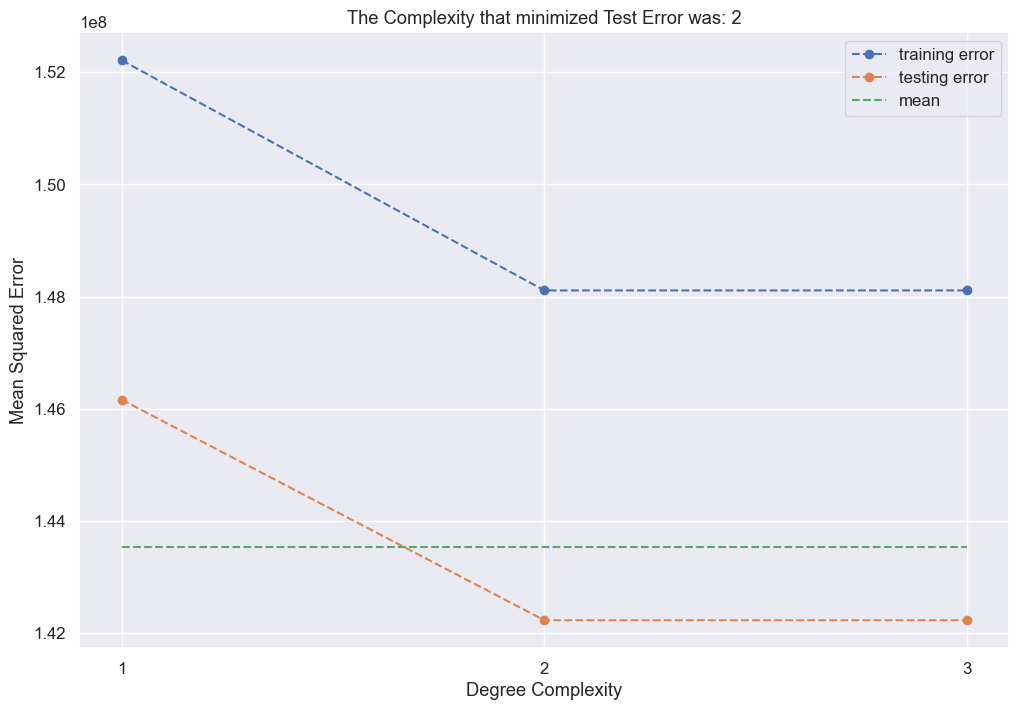

In [215]:
# check effectiveness of complexity!
plt.subplots(figsize=(12,8))
plt.plot(range(1, complexity), train_mses, '--o', label = 'training error')
plt.plot(range(1, complexity), test_mses, '--o', label = 'testing error')
plt.plot(range(1, complexity), [np.mean(test_mses)]*(complexity-1), '--', label = 'mean')
plt.xticks(range(1, complexity), range(1, complexity))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.title(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.legend()

In [216]:
# Find best alpha for Ridge regressor for degree complexity = 2
alphas = [0.001, 0.01, 1.0, 10.0]
features = X_train.select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )
pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge( ))) ])
param_dict = {'ttregressor__regressor__alpha': alphas}
grid = GridSearchCV(pipe, param_grid=param_dict, scoring = 'neg_mean_squared_error')
#grid = GridSearchCV(pipe, param_grid=param_dict)

#fit on train
grid.fit(X_train, y_train)
train_mse = mean_squared_error(y_train, grid.predict(X_train))
test_mse = mean_squared_error(y_test, grid.predict(X_test))
best_alpha = grid.best_params_
# Results
print('Best Alpha:', best_alpha)
print('Score:', grid.score(X_test, y_test))
print('Best Estimator Reults:', grid.best_estimator_)

Best Alpha: {'ttregressor__regressor__alpha': 0.001}
Score: -38660974.14856864
Best Estimator Reults: Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['transmission', 'type'], dtype='object'))])),
                ('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('ttregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge(alpha=0.001)))])


In [217]:
grid.best_estimator_.named_steps['ttregressor'].regressor_.coef_

array([-9.07002128e-01, -6.73164960e+00,  7.69715510e+00, -2.96769299e+00,
        1.45625901e-01,  8.81113684e-01,  2.47133919e+00, -8.14456108e-01,
       -7.22380780e-01,  3.00917818e-01,  7.90050672e-02,  4.52536319e+00,
       -3.91139886e+00,  3.18234711e+00,  2.10969369e-01, -5.31293162e-01,
       -3.19939437e+01, -5.52137959e+00, -5.65599234e+00,  1.01404357e+00,
       -2.29407871e+00, -1.11707135e+00, -9.70774831e+00, -2.67710839e+00,
        1.24162682e-01, -9.07002184e-01,  0.00000000e+00,  0.00000000e+00,
       -6.55589194e-01,  2.56985682e-02,  1.34151292e-01,  1.42474529e-01,
       -7.09385500e-01, -5.52442244e-02,  1.49667982e-01, -4.41463802e-01,
        2.08662801e-01, -1.08432803e+00,  4.95158761e-01,  1.16062039e-03,
       -2.98969285e-01,  3.41548903e+00, -5.69017068e-01, -6.17606237e-01,
        1.44867976e-01, -6.08804680e-01, -1.77531816e-01, -1.56023757e+00,
       -5.01996356e-01,  1.93104870e-02, -6.73164998e+00,  0.00000000e+00,
       -3.65298661e+00,  

In [220]:
grid.best_estimator_.named_steps['ttregressor'].regressor_

Ridge(alpha=0.001)

In [221]:
features = X_train.select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge(alpha = 10))) ])
#fit on train
pipe.fit(X_train, y_train)
print('Train MSE:', mean_squared_error(y_train, pipe.predict(X_train)))
print('Test MSE :', mean_squared_error(y_test, pipe.predict(X_test)))
print('Train MAE:', mean_absolute_error(y_train, pipe.predict(X_train)))
print('Test MAE :', mean_absolute_error(y_test, pipe.predict(X_test)))
print('Score    :', pipe.score(X_test, y_test))

Train MSE: 44264652.81393257
Test MSE : 40307698.38225459
Train MAE: 4165.813127347149
Test MAE : 4136.292986410604
Score    : 0.8002524676774442


In [224]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train.columns)

# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]


In [225]:
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)
feature_names

array(['1', 'transmission_0.0', 'transmission_1.0', 'transmission_2.0',
       'type_SUV', 'type_bus', 'type_convertible', 'type_coupe',
       'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other',
       'type_pickup', 'type_sedan', 'type_truck', 'type_van',
       'type_wagon', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'drive', 'region_map', 'manufacturer_freqs', 'paint_freqs',
       'transmission_0.0^2', 'transmission_0.0 transmission_1.0',
       'transmission_0.0 transmission_2.0', 'transmission_0.0 type_SUV',
       'transmission_0.0 type_bus', 'transmission_0.0 type_convertible',
       'transmission_0.0 type_coupe', 'transmission_0.0 type_hatchback',
       'transmission_0.0 type_mini-van', 'transmission_0.0 type_offroad',
       'transmission_0.0 type_other', 'transmission_0.0 type_pickup',
       'transmission_0.0 type_sedan', 'transmission_0.0 type_truck',
       'transmission_0.0 type_van', 'transmission_0.0 type_wagon',
       'transmission_0

In [226]:
# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs

Coefficients
year^2                     0.900013
transmission_1.0 year      0.544272
type_SUV year              0.410638
year region_map            0.397181
year condition             0.371667
...                             ...
fuel^2                    -0.461776
type_coupe year           -0.546827
year                      -0.568491
type_convertible year     -0.579698
transmission_0.0 year     -0.775438

[351 rows x 1 columns]

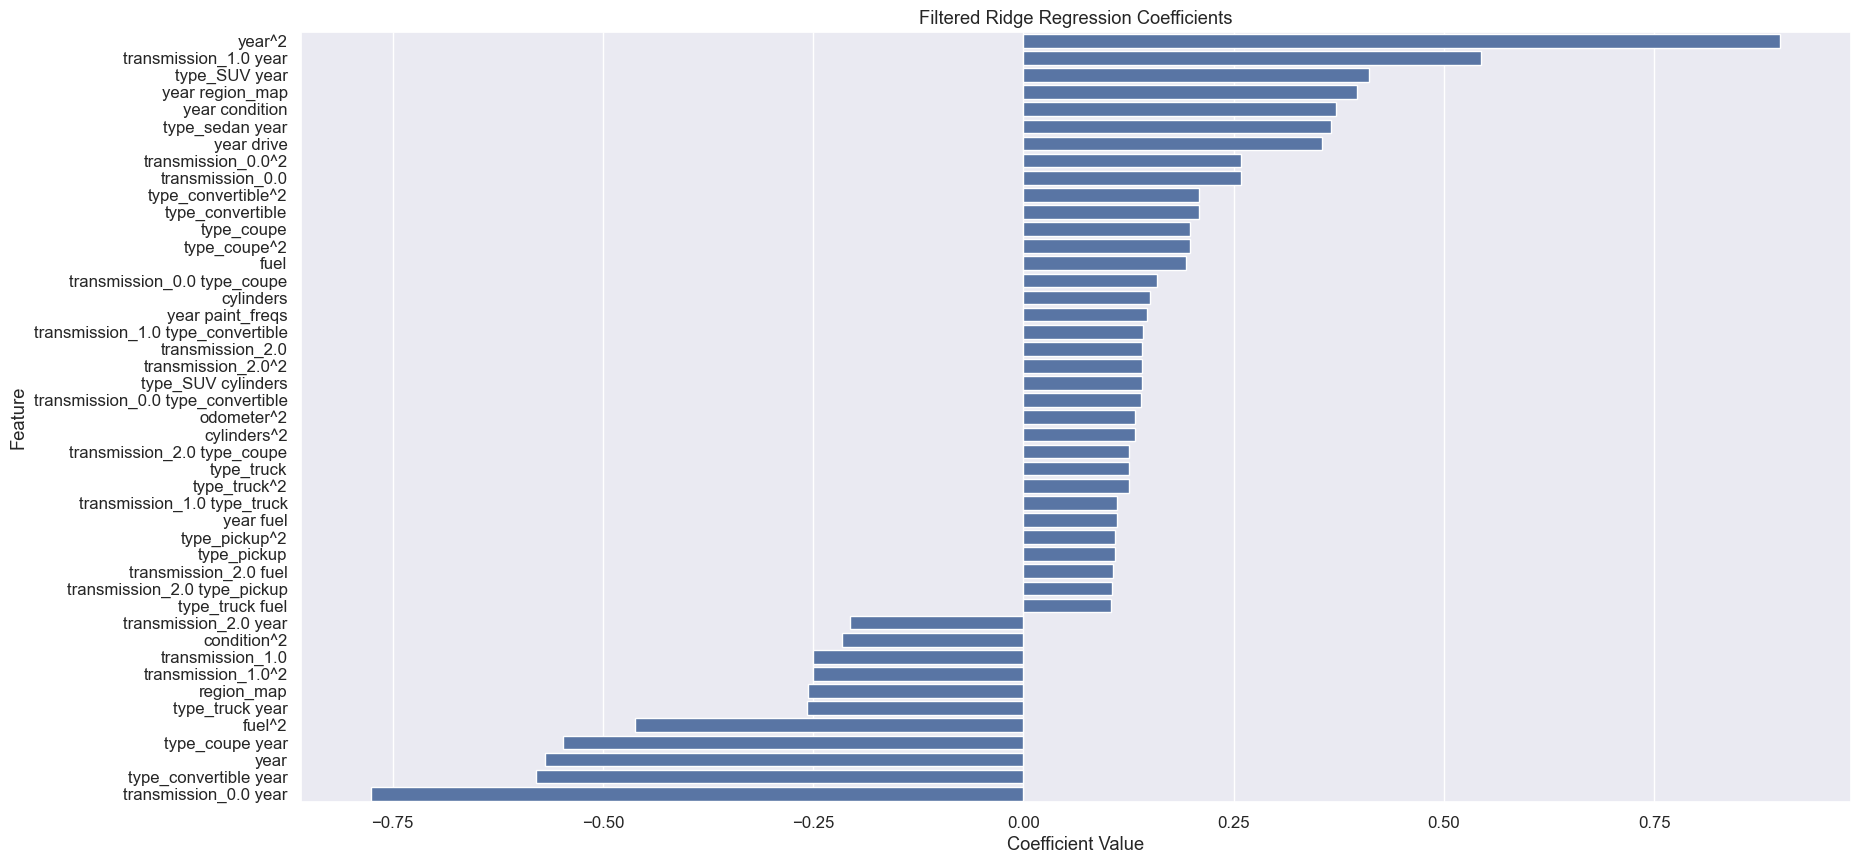

In [233]:
coefs['features']=coefs.index

coefs_filtered = coefs[(coefs['Coefficients'] > 0.1)|(coefs['Coefficients'] < -0.2) ]
# Plot the filtered coefficients using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='Coefficients', y='features', data=coefs_filtered)
plt.title('Filtered Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [234]:
features_list=['year','cylinders','odometer','type','transmission','region_map','condition']

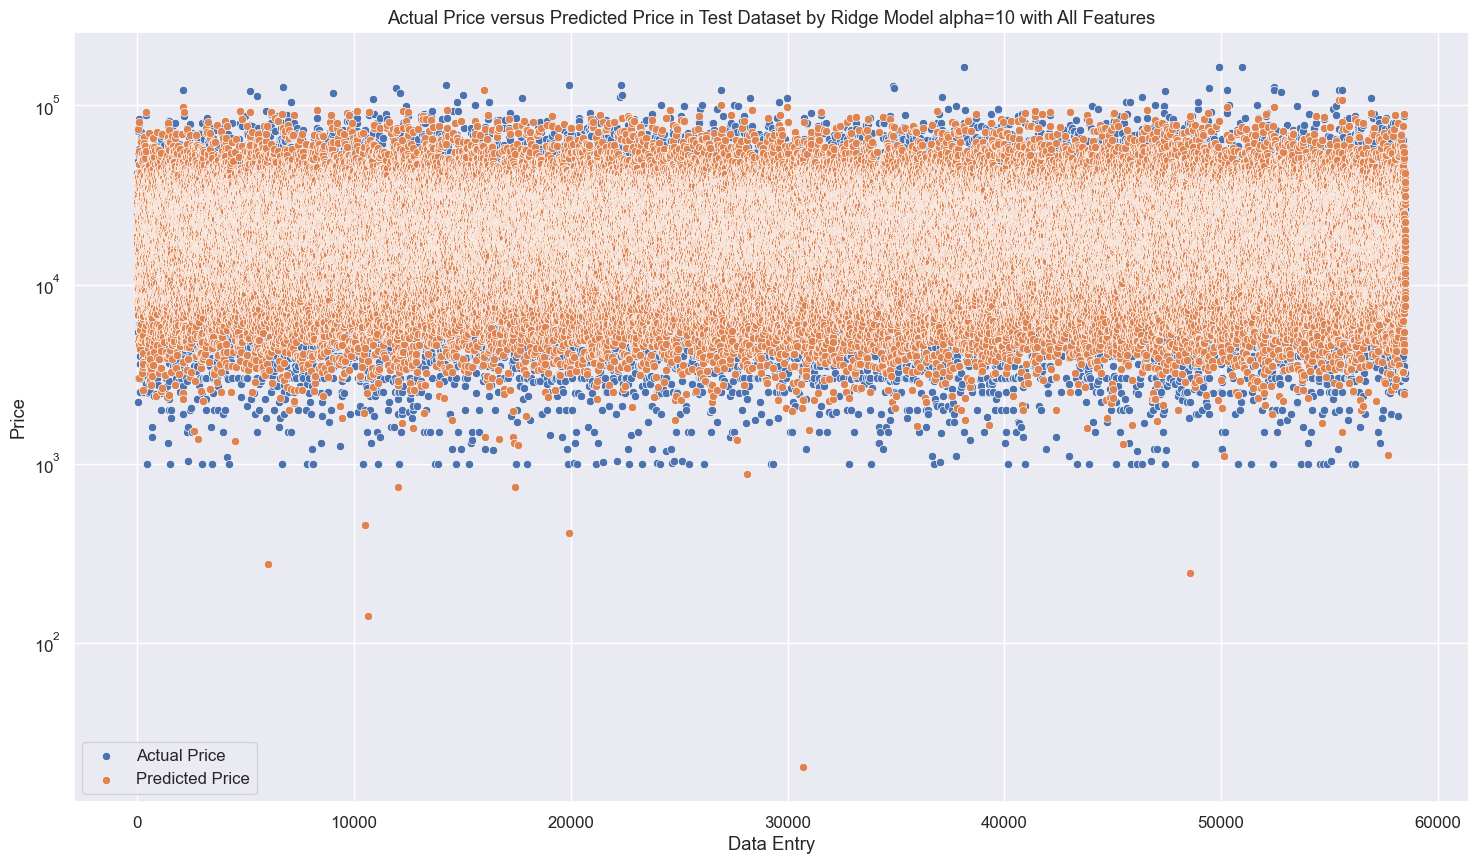

In [227]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model alpha=10 with All Features')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

In [235]:
# Best Ridge without complexity degree
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge(alpha = 10))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
print('Train MSE:', mean_squared_error(y_train, pipe.predict(X_train[features_list])))
print('Test MSE :', mean_squared_error(y_test, pipe.predict(X_test[features_list])))
print('Train MAE:', mean_absolute_error(y_train, pipe.predict(X_train[features_list])))
print('Test MAE :', mean_absolute_error(y_test, pipe.predict(X_test[features_list])))
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 73128142.6683532
Test MSE : 68491888.3864433
Train MAE: 5500.044864040791
Test MAE : 5449.1927024224615
Score    : 0.6605838031345632


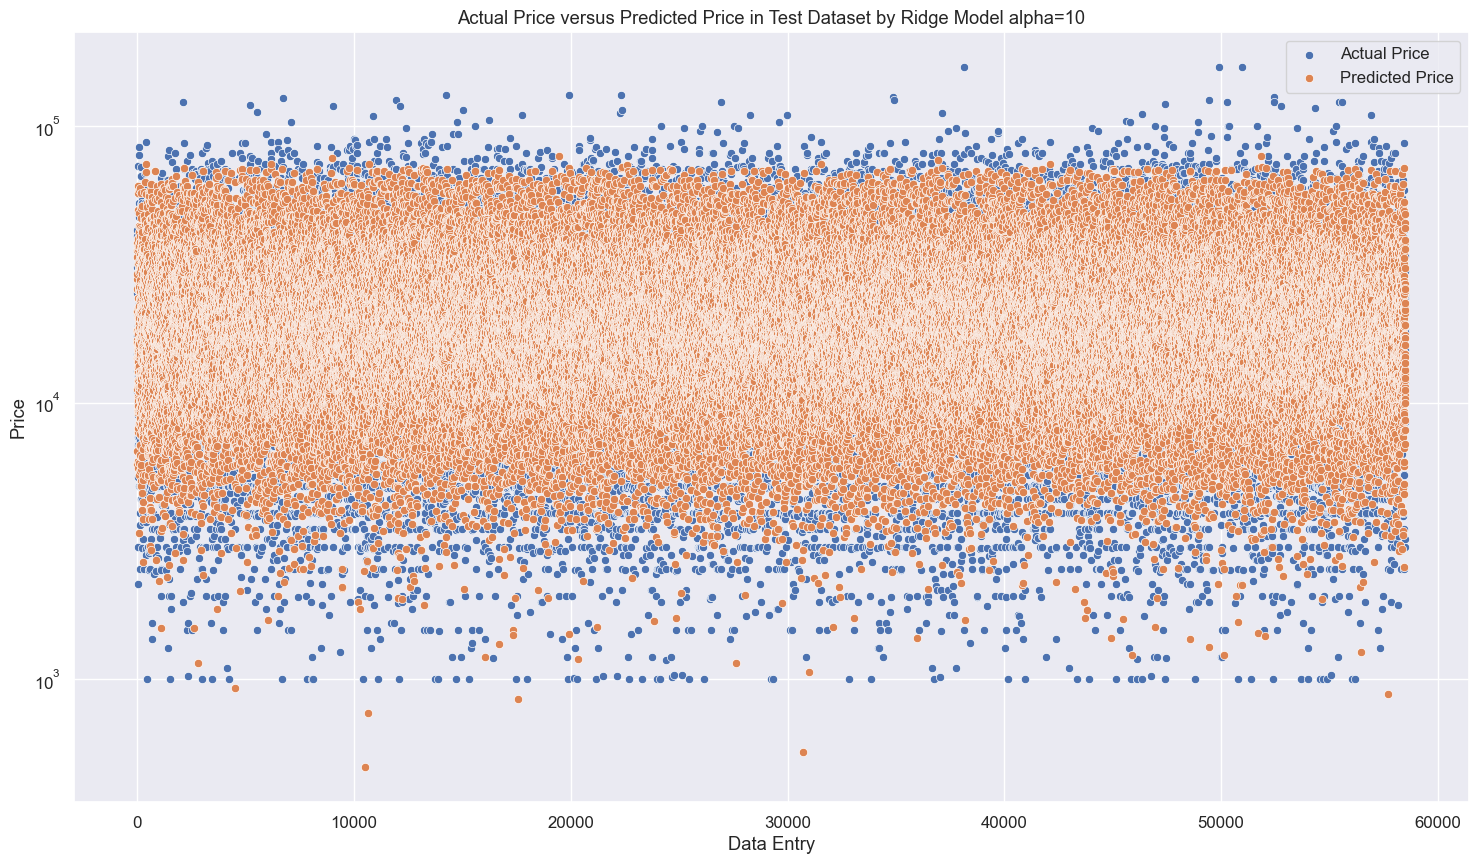

In [236]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model alpha=10')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

In [237]:
# Best Ridge
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Ridge(alpha = 10))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
ridge_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
ridge_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
ridge_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
ridge_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', ridge_train_mse)
print('Test MSE :', ridge_test_mse)
print('Train MAE:', ridge_train_mae)
print('Test MAE :', ridge_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 59283225.148839094
Test MSE : 55016159.68032996
Train MAE: 4931.172280761148
Test MAE : 4886.737460398946
Score    : 0.7273636904346876


In [239]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs

Coefficients
year^2                     0.932763
transmission_1.0 year      0.605480
year condition             0.429171
year region_map            0.404921
type_SUV year              0.340590
...                             ...
transmission_1.0          -0.273712
year                      -0.586674
type_convertible year     -0.620658
type_coupe year           -0.648767
transmission_0.0 year     -0.838388

[253 rows x 1 columns]

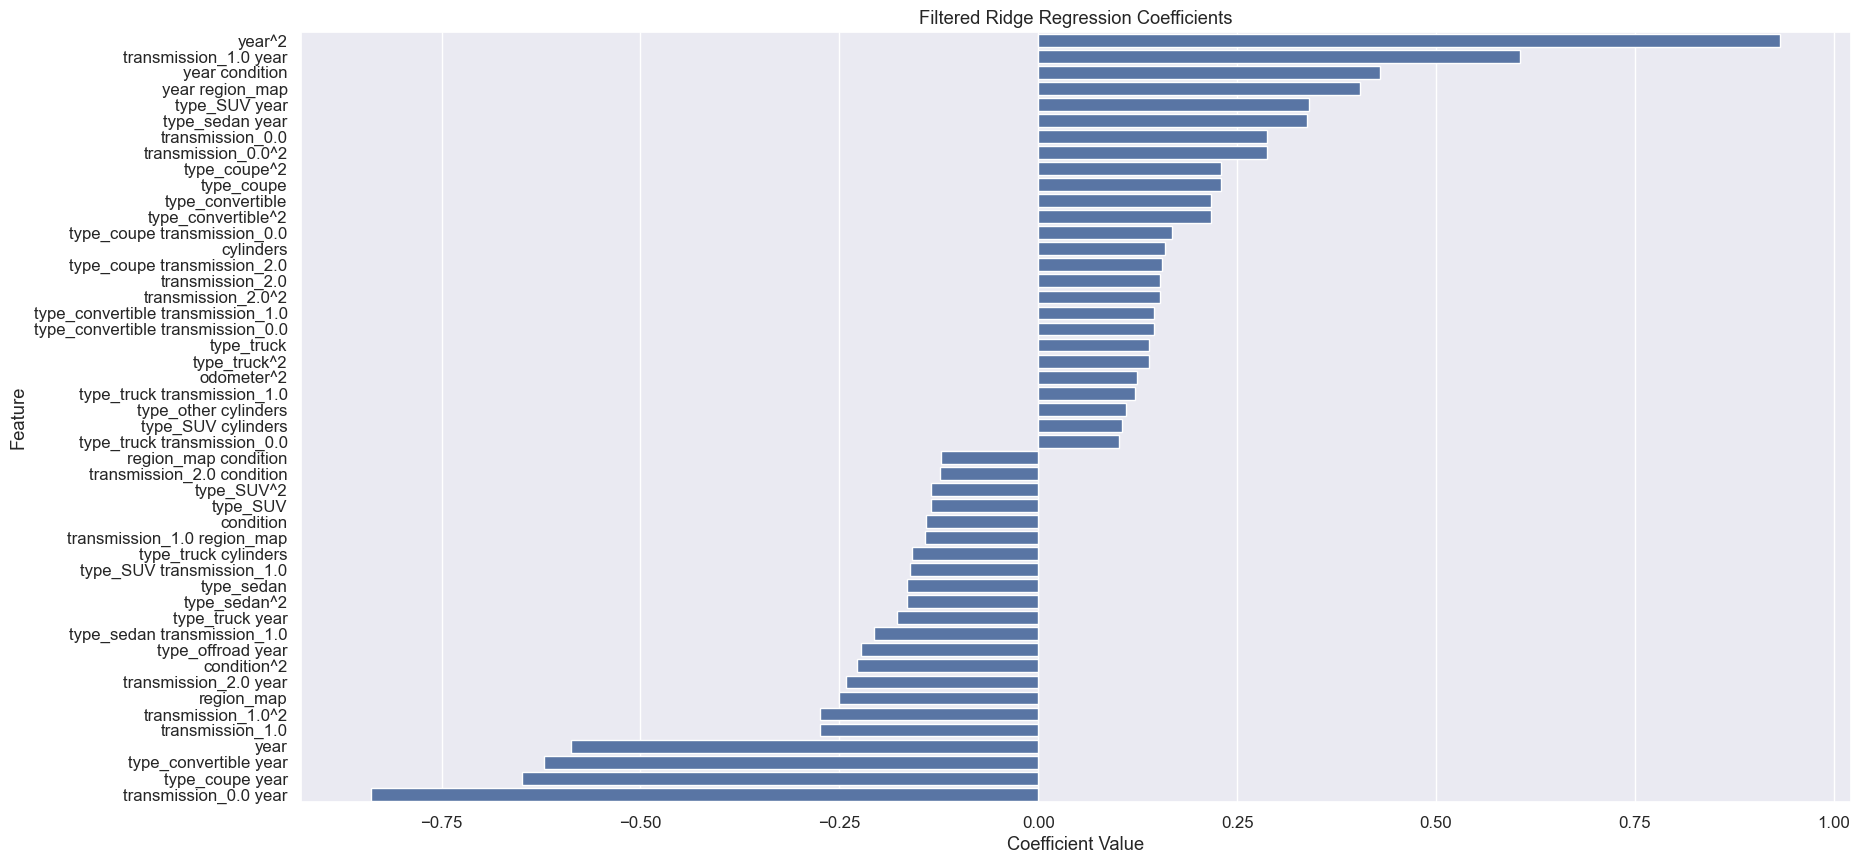

In [240]:
coefs['features']=coefs.index

coefs_filtered = coefs[(coefs['Coefficients'] > 0.1)|(coefs['Coefficients'] < -0.1) ]
# Plot the filtered coefficients using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='Coefficients', y='features', data=coefs_filtered)
plt.title('Filtered Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

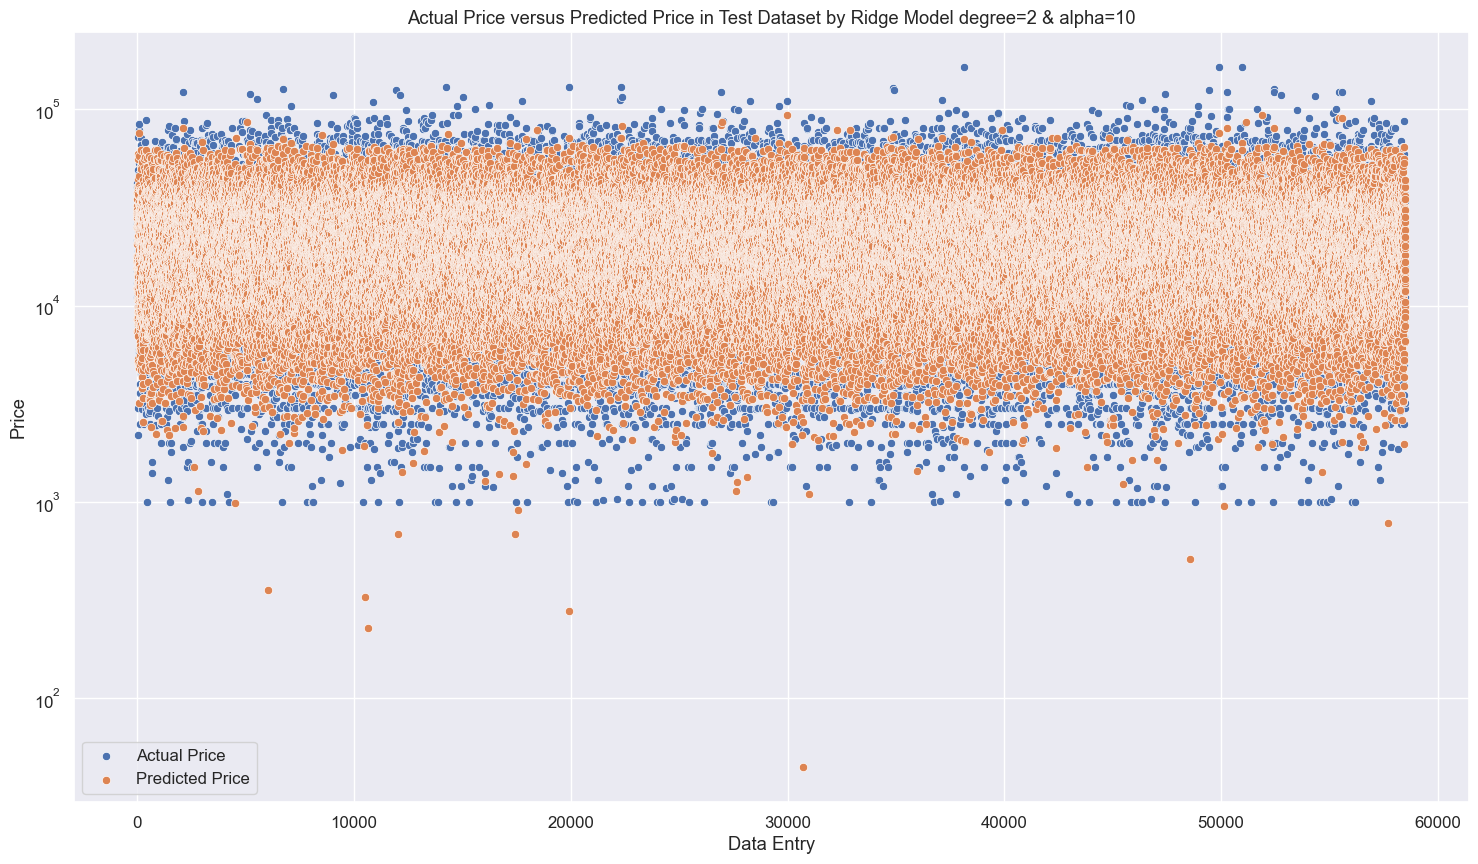

In [241]:
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model degree=2 & alpha=10')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

In [266]:
%%time
# LASSO
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Lasso(alpha = 0.01, random_state = 93,
                                                                            max_iter=1000, tol=0.1))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lasso_train_mse)
print('Test MSE :', lasso_test_mse)
print('Train MAE:', lasso_train_mae)
print('Test MAE :', lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 68304225.24852014
Test MSE : 63678626.22506197
Train MAE: 5304.79159928928
Test MAE : 5257.232998293048
Score    : 0.6844362501296695
CPU times: total: 6.78 s
Wall time: 4.24 s


In [243]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs[coefs['Coefficients'] != 0]

Coefficients
year                              0.372757
type_pickup                       0.171472
cylinders                         0.140480
type_truck                        0.108484
odometer^2                        0.066542
...                                    ...
type_pickup transmission_2.0     -0.068568
type_pickup^2                    -0.073458
transmission_1.0                 -0.106594
odometer                         -0.119100
type_sedan                       -0.145283

[63 rows x 1 columns]

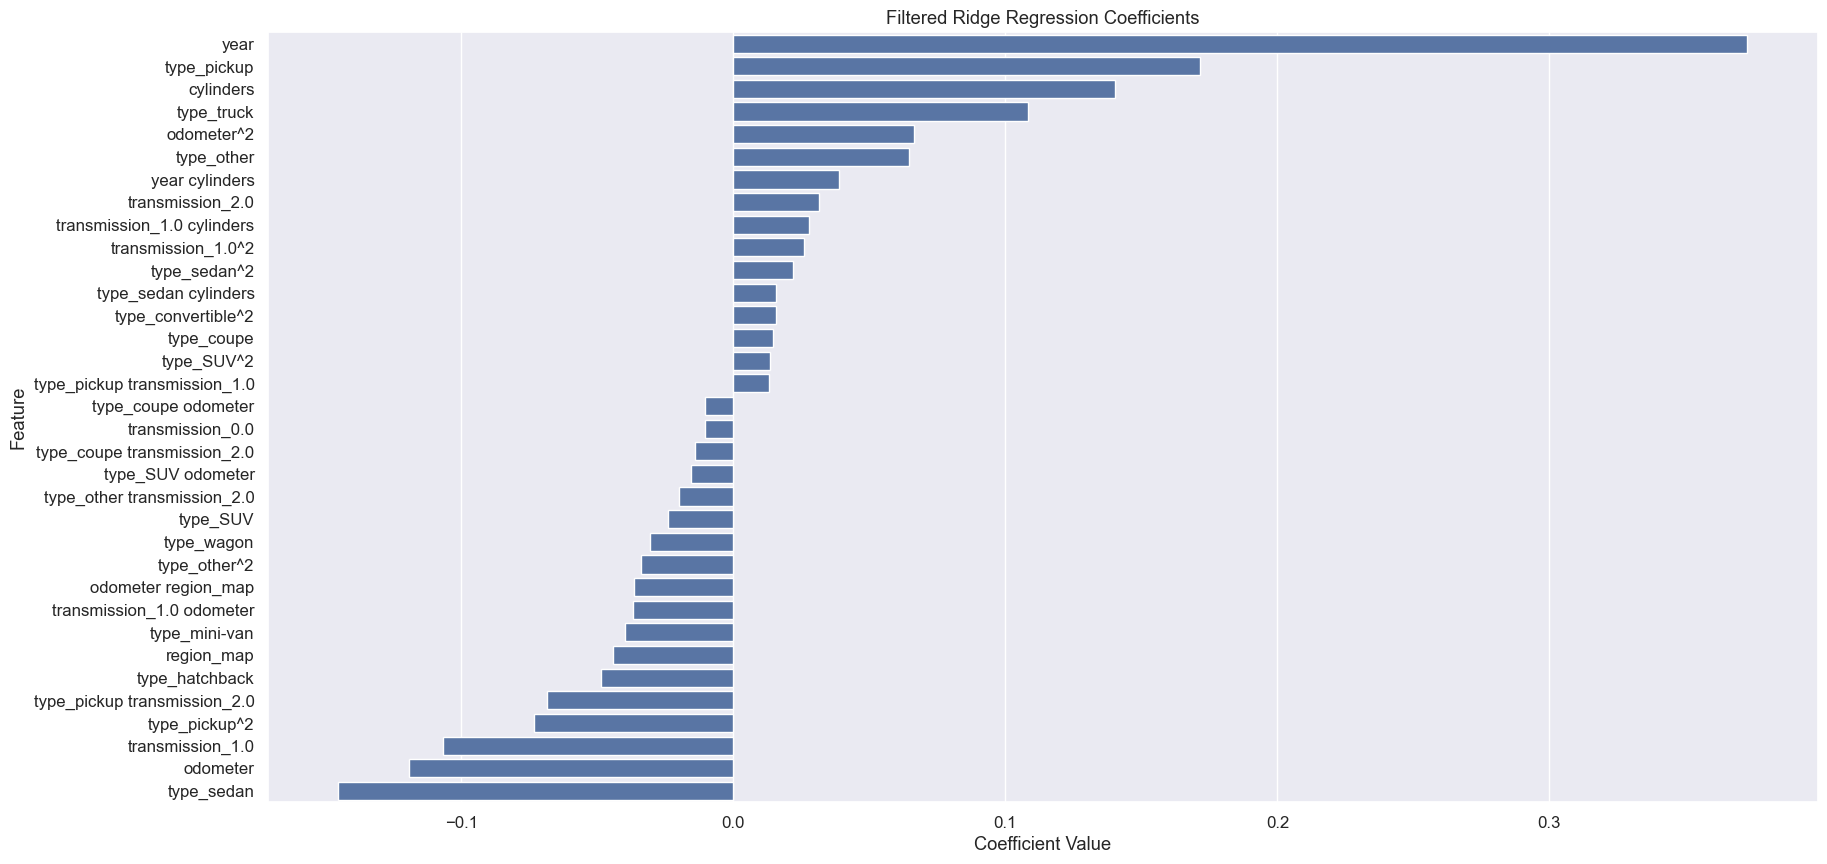

In [245]:
coefs['features']=coefs.index

coefs_filtered = coefs[(coefs['Coefficients'] > 0.01)|(coefs['Coefficients'] < -0.01) ]
# Plot the filtered coefficients using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='Coefficients', y='features', data=coefs_filtered)
plt.title('Filtered Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

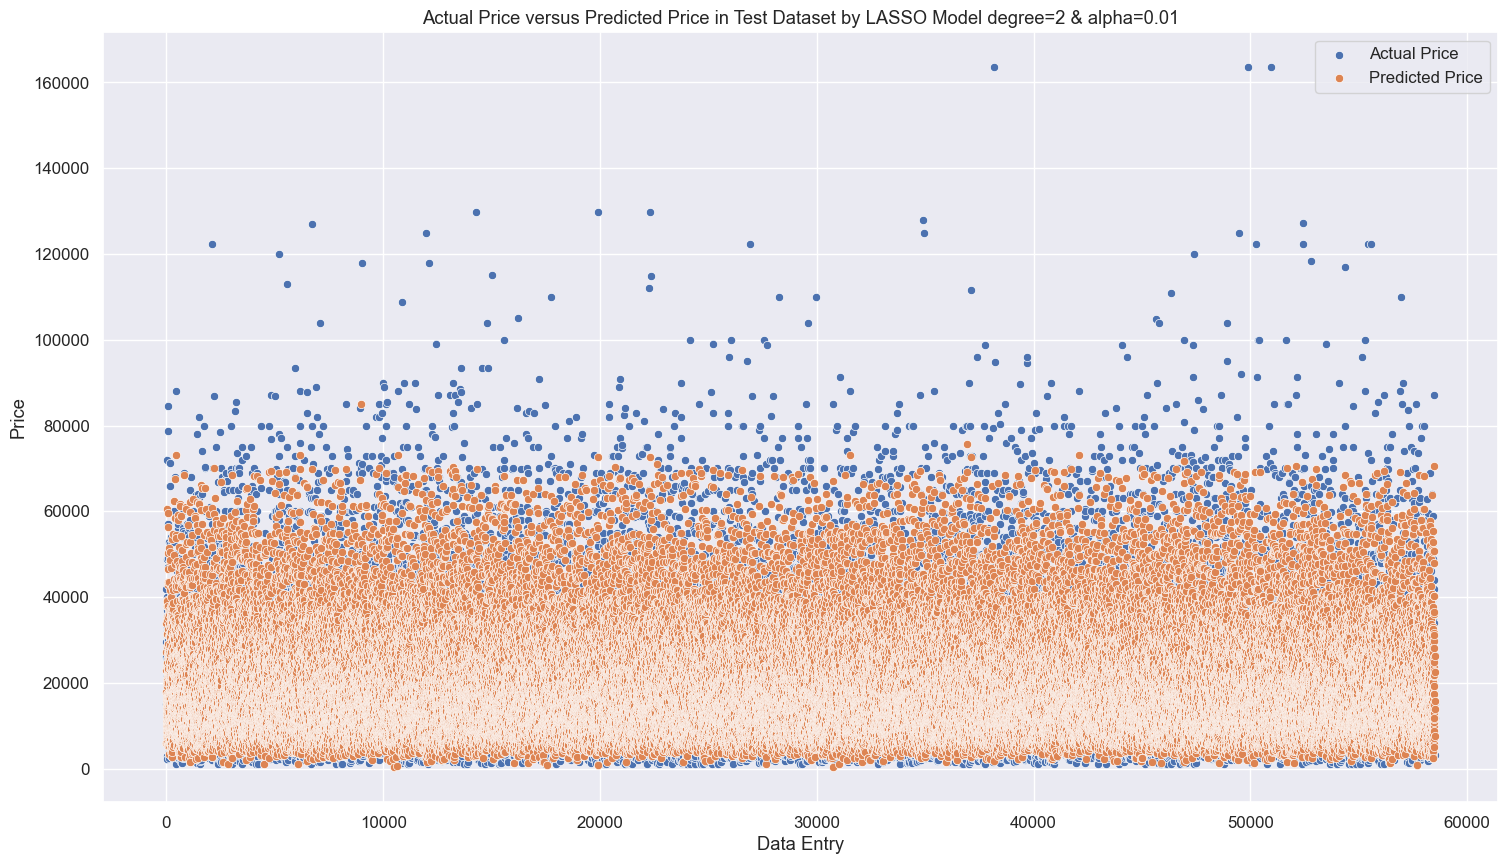

In [246]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
#splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by LASSO Model degree=2 & alpha=0.01')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

In [247]:
# LinearRegression
features = features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=LinearRegression())) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lr_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lr_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lr_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lr_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_train_mse)
print('Test MSE :', lr_test_mse)
print('Train MAE:', lr_train_mae)
print('Test MAE :', lr_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 57451127.56559753
Test MSE : 53146596.94915513
Train MAE: 4867.427287623458
Test MAE : 4811.615136602314
Score    : 0.7366284353112842


In [248]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs[abs(coefs['Coefficients'])>2]

Coefficients
odometer                           1.064128e+12
type_convertible transmission_1.0  4.890539e+11
type_SUV condition                 4.099534e+11
type_sedan condition               4.048874e+11
type_pickup condition              3.527985e+11
...                                         ...
type_SUV odometer                 -2.840247e+11
type_SUV type_hatchback           -2.896570e+11
type_sedan odometer               -3.095585e+11
type_convertible^2                -5.670895e+11
transmission_1.0 odometer         -7.228738e+11

[219 rows x 1 columns]

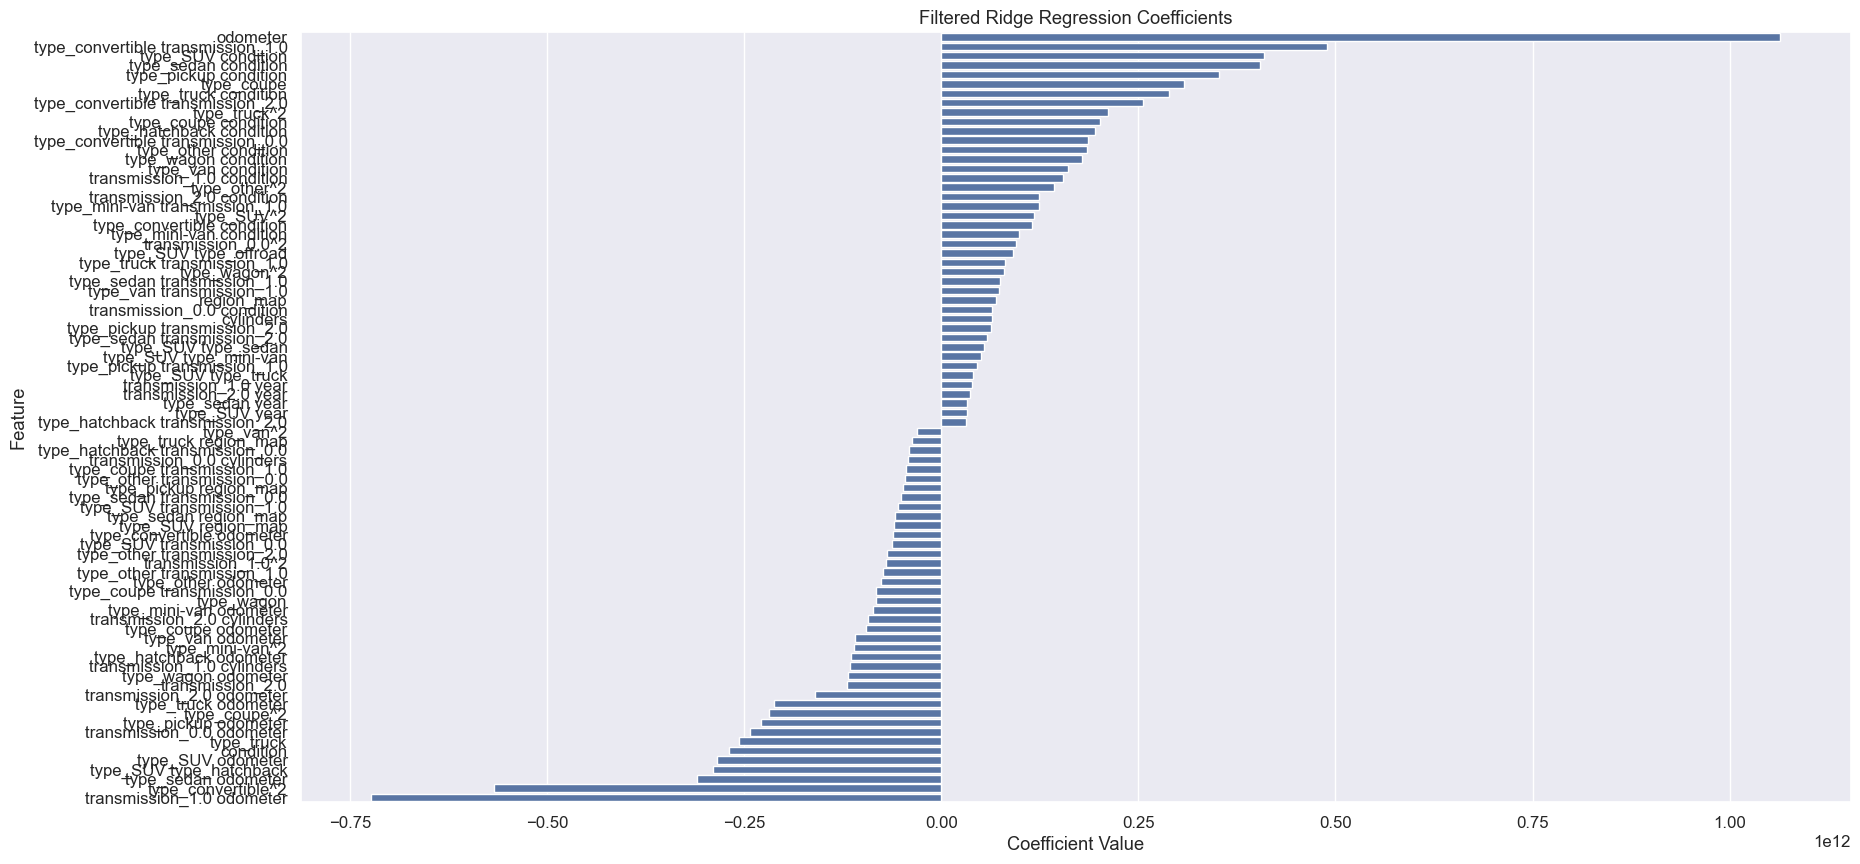

In [259]:
coefs['features']=coefs.index

coefs_filtered = coefs[(coefs['Coefficients'] > 3.0e+10)|(coefs['Coefficients'] <-3.0e+10)]
# Plot the filtered coefficients using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='Coefficients', y='features', data=coefs_filtered)
plt.title('Filtered Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [260]:
# Linear Regression with Feature selection by LASSO
features = features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
               ('polyfeatures', PolynomialFeatures(degree = 2, include_bias = True)),
               ('scaler', StandardScaler(with_mean=False)),
               ('selector', SelectFromModel(Lasso(alpha = 0.01, random_state = 93, max_iter=500, tol=0.3))),
               ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                    inverse_func=np.expm1,
                                                    regressor=LinearRegression()))
              ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lr_w_lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lr_w_lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lr_w_lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lr_w_lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_w_lasso_train_mse)
print('Test MSE :', lr_w_lasso_test_mse)
print('Train MAE:', lr_w_lasso_train_mae)
print('Test MAE :', lr_w_lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 57456285.886104986
Test MSE : 53180755.46243479
Train MAE: 4872.517335723355
Test MAE : 4816.894722744244
Score    : 0.7364591604826717


In [262]:
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
poly_feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)
# selector feature names
feature_names = pipe.named_steps['selector'].get_feature_names_out(poly_feature_names)
#feature_names.shape

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)
coefs

Coefficients
type_convertible^2                 1.070714e+12
type_SUV condition                 5.394139e+11
region_map                         5.327845e+11
type_sedan condition               5.327481e+11
type_pickup condition              4.642099e+11
...                                         ...
type_convertible transmission_2.0 -3.703553e+11
odometer                          -4.572675e+11
transmission_1.0 region_map       -4.744540e+11
transmission_0.0^2                -7.041275e+11
type_convertible transmission_1.0 -8.579198e+11

[169 rows x 1 columns]

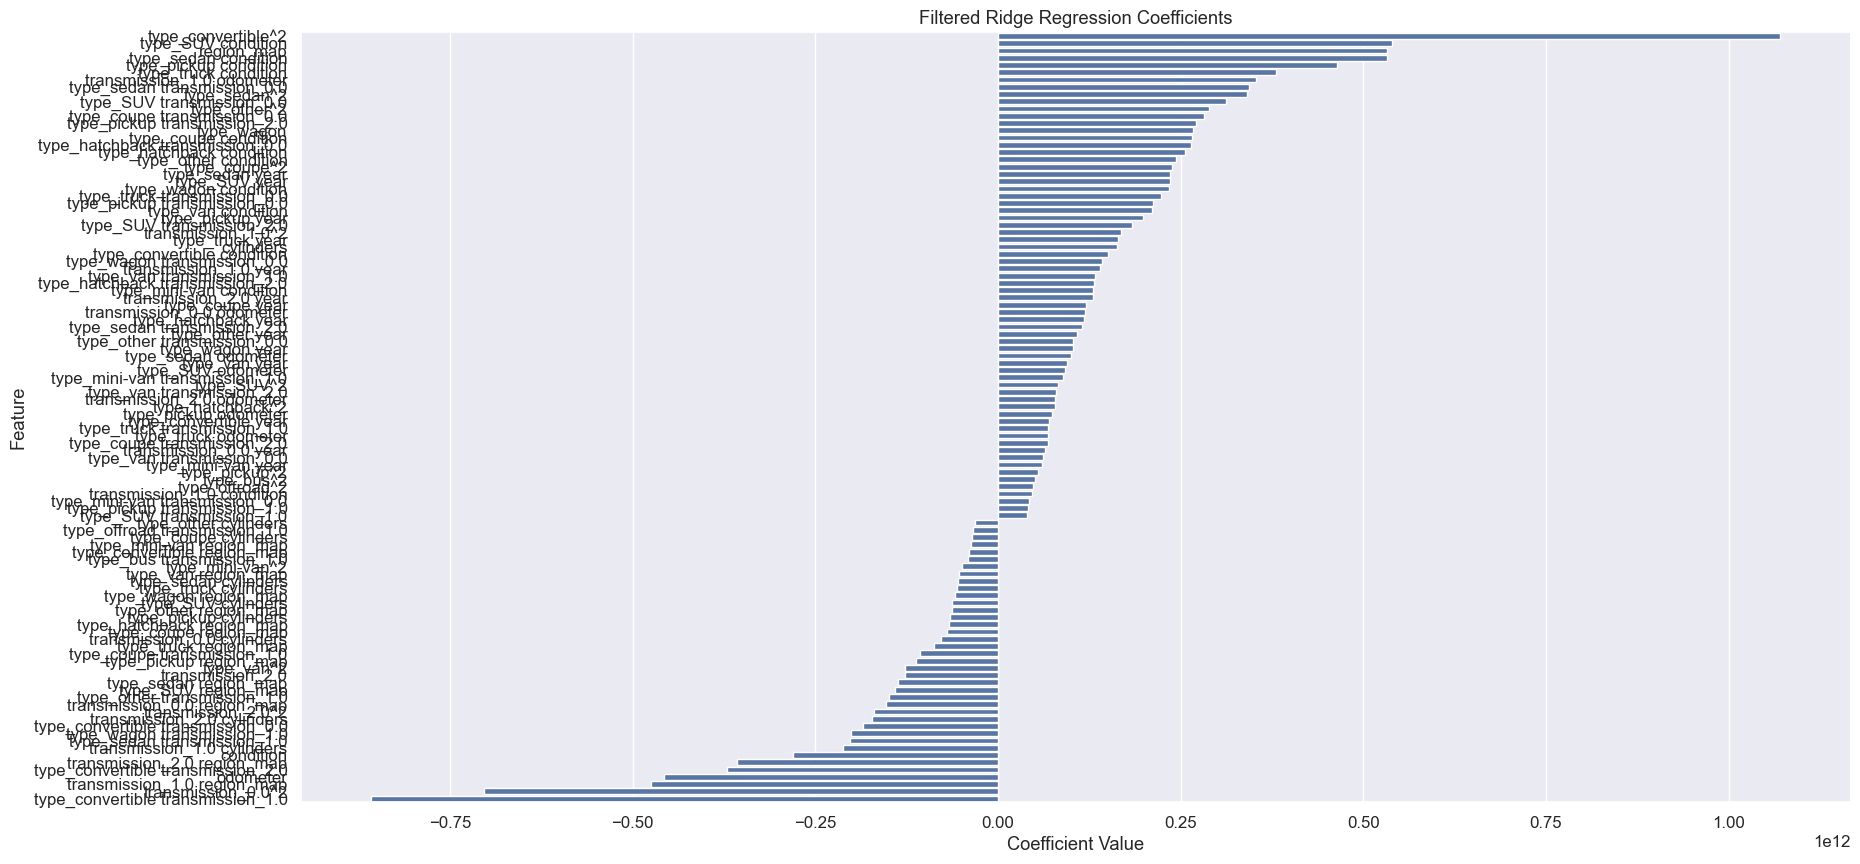

In [264]:
coefs['features']=coefs.index

coefs_filtered = coefs[(coefs['Coefficients'] > 4.0e+10)|(coefs['Coefficients'] <-3.0e+10)]
# Plot the filtered coefficients using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='Coefficients', y='features', data=coefs_filtered)
plt.title('Filtered Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

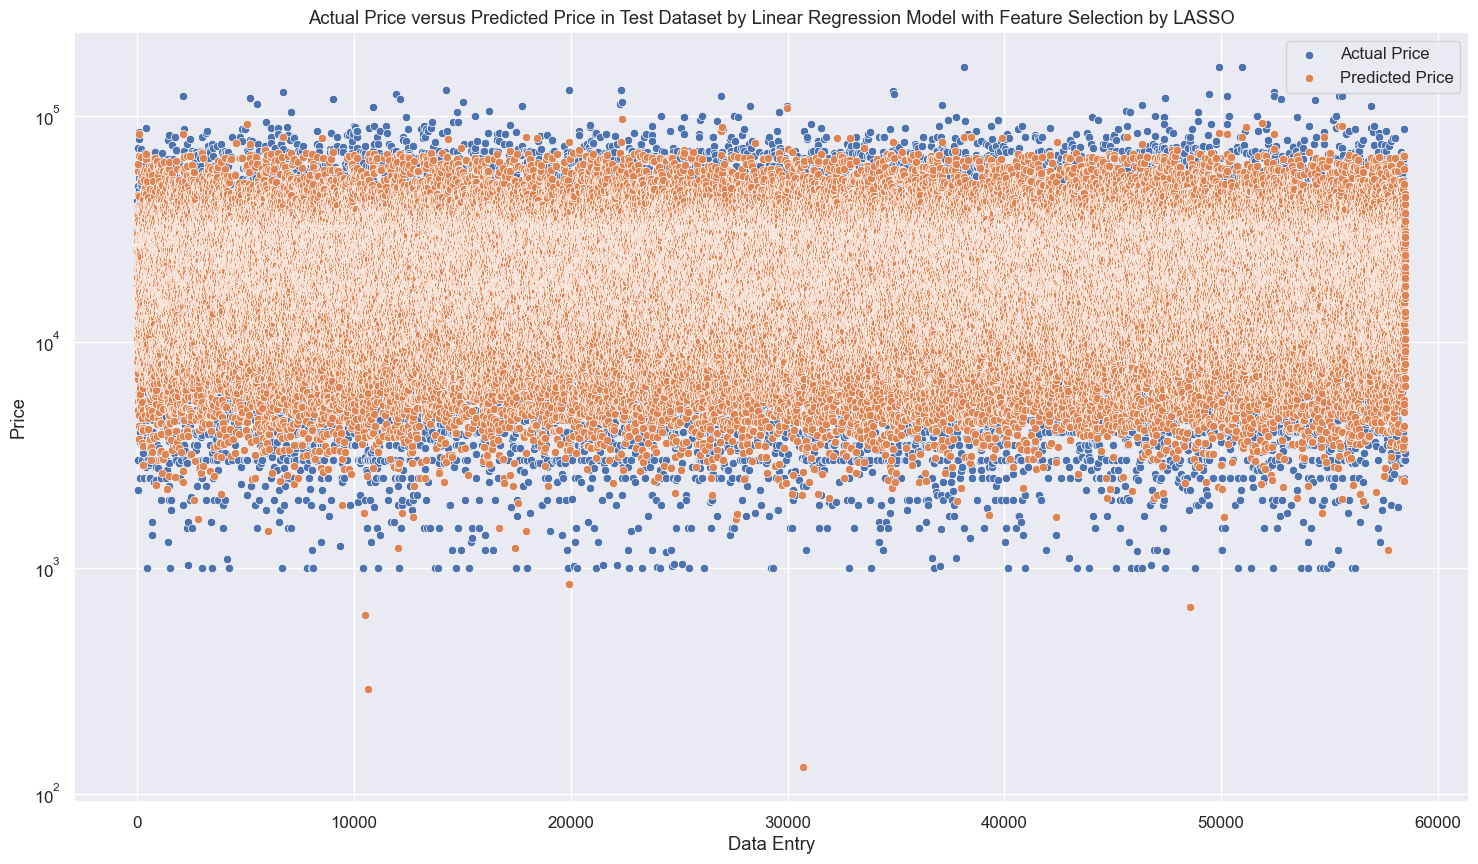

In [265]:
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Linear Regression Model with Feature Selection by LASSO')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.show()

The Model that minimized Test Error was: 3


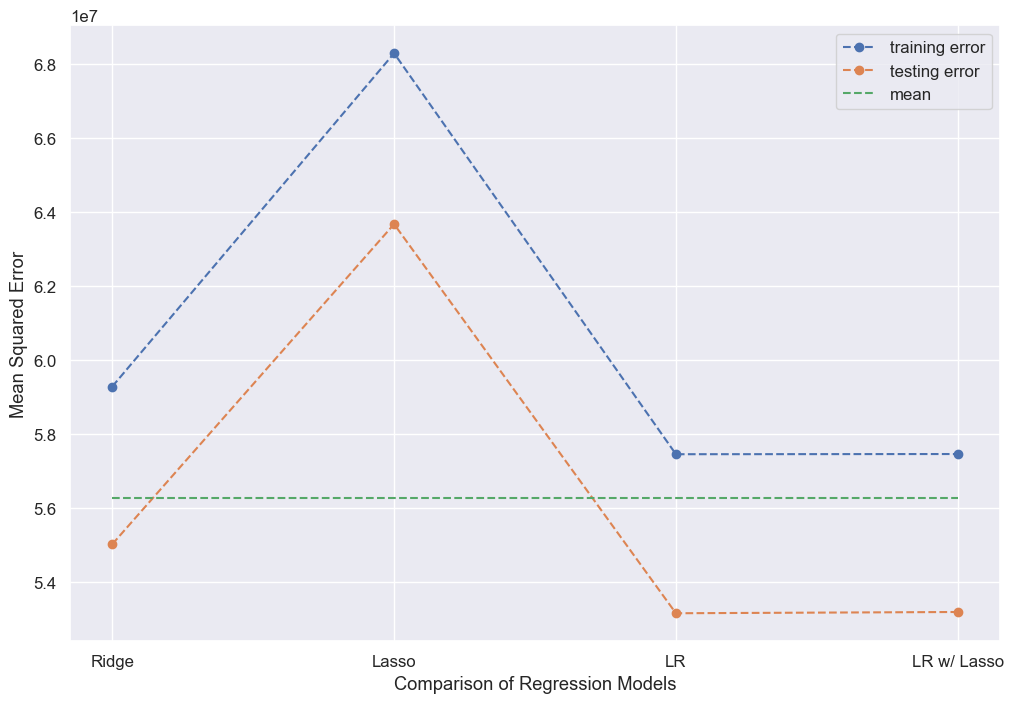

In [267]:
# Compare all 4 MSE results!
test_mses = [ridge_test_mse, lasso_test_mse, lr_test_mse, lr_w_lasso_test_mse]
train_mses = [ridge_train_mse, lasso_train_mse, lr_train_mse, lr_w_lasso_train_mse]
print(f'The Model that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.subplots(figsize=(12,8))
plt.plot(range(1, 5), train_mses, '--o', label = 'training error')
plt.plot(range(1, 5), test_mses, '--o', label = 'testing error')
plt.plot(range(1, 5), [np.mean(test_mses)]*4, '--', label = 'mean')
plt.xticks(range(1, 5), ['Ridge', 'Lasso', 'LR', 'LR w/ Lasso'])
plt.xlabel('Comparison of Regression Models')
plt.ylabel('Mean Squared Error')
plt.legend()

The Model that minimized Test Error was: 3


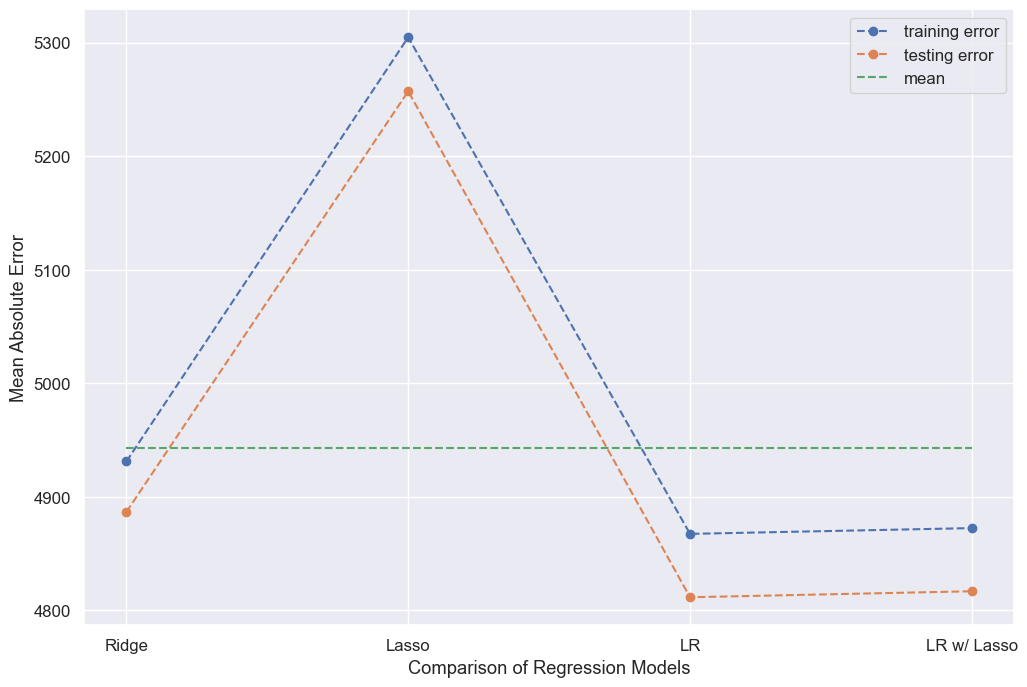

In [268]:
test_maes = [ridge_test_mae, lasso_test_mae, lr_test_mae, lr_w_lasso_test_mae]
train_maes = [ridge_train_mae, lasso_train_mae, lr_train_mae, lr_w_lasso_train_mae]
print(f'The Model that minimized Test Error was: {test_maes.index(min(test_maes)) + 1}')
plt.subplots(figsize=(12,8))
plt.plot(range(1, 5), train_maes, '--o', label = 'training error')
plt.plot(range(1, 5), test_maes, '--o', label = 'testing error')
plt.plot(range(1, 5), [np.mean(test_maes)]*4, '--', label = 'mean')
plt.xticks(range(1, 5), ['Ridge', 'Lasso', 'LR', 'LR w/ Lasso'])
plt.xlabel('Comparison of Regression Models')
plt.ylabel('Mean Absolute Error')
plt.legend()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.